<a href="https://colab.research.google.com/github/Saim-Hassan786/LangGraph_01/blob/main/LangGraph_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install --quiet -U langgraph

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 138.2/138.2 kB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.7/44.7 kB 2.1 MB/s eta 0:00:00


In [ ]:
from typing_extensions import TypedDict

class LearningState(TypedDict):
  prompt : str

In [ ]:
def Node_1(state:LearningState) -> LearningState :
  print("-----Node 1-------", state)
  return{"prompt":state["prompt"] + " I am Saim "}

def Node_2(state:LearningState) -> LearningState :
  print("-----Node 2-----", state)
  return {"prompt" : state["prompt"] + "An AI Engineering Aspirant"}

In [ ]:
from IPython.display import display , Image

In [ ]:
from langgraph.graph import START, END, StateGraph

In [ ]:
from langgraph.graph.state import CompiledStateGraph

In [ ]:
builder : StateGraph = StateGraph(state_schema=LearningState)

In [ ]:
builder.add_node("Node_1",Node_1)
builder.add_node("Node_2",Node_2)

In [ ]:
builder.add_edge(START,"Node_1")
builder.add_edge("Node_1","Node_2")
builder.add_edge("Node_2", END)

In [ ]:
graph : CompiledStateGraph = builder.compile()

In [ ]:
print(graph)

In [ ]:
print(graph.get_graph())

Graph(nodes={'__start__': Node(id='__start__', name='__start__', data=<class 'langchain_core.utils.pydantic.LangGraphInput'>, metadata=None), 'Node_1': Node(id='Node_1', name='Node_1', data=Node_1(tags=None, recurse=True, func_accepts_config=False, func_accepts={'writer': False, 'store': False}), metadata=None), 'Node_2': Node(id='Node_2', name='Node_2', data=Node_2(tags=None, recurse=True, func_accepts_config=False, func_accepts={'writer': False, 'store': False}), metadata=None), '__end__': Node(id='__end__', name='__end__', data=<class 'langchain_core.utils.pydantic.LangGraphOutput'>, metadata=None)}, edges=[Edge(source='Node_1', target='Node_2', data=None, conditional=False), Edge(source='Node_2', target='__end__', data=None, conditional=False), Edge(source='__start__', target='Node_1', data=None, conditional=False)])


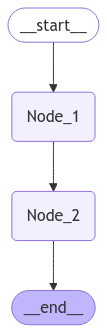

In [ ]:
display(Image(graph.get_graph().draw_mermaid_png()))

In [ ]:
graph.invoke({"prompt":"Hi"})

-----Node 1------- {'prompt': 'Hi'}
-----Node 2----- {'prompt': 'Hi I am Saim '}


{'prompt': 'Hi I am Saim An AI Engineering Aspirant'}

In [ ]:
builder_1 : StateGraph = StateGraph(state_schema=LearningState)

In [ ]:
def Node_A(state:LearningState) -> LearningState :
  print("-----Node_A-----",state)
  return {"prompt":state["prompt"] + " Myself Saim Hassan Akhar "}

def Node_B(state:LearningState) -> LearningState :
  print("-----Node_B-----",state)
  return {"prompt":state["prompt"] + "And I Am An Aspirant Of AI Engineering ."}

def Node_C(state:LearningState) -> LearningState :
  print("-----Node_C-----", state)
  return {"prompt":state["prompt"] + "I Am Looking Forward To Excel In AI Field "}

def Node_D(state:LearningState) -> LearningState  :
  print("-----Node_D-----",state)
  return{"prompt":state["prompt"] + "And Learn The Cutting Edge Technologies Of Agentic AI And Humanoid Robotics."}


In [ ]:
builder_1.add_node("Node_A",Node_A)
builder_1.add_node("Node_B",Node_B)
builder_1.add_node("Node_C",Node_C)
builder_1.add_node("Node_D",Node_D)

In [ ]:
builder_1.add_edge(START,"Node_A")
builder_1.add_edge("Node_A","Node_B")
builder_1.add_edge("Node_B","Node_C")
builder_1.add_edge("Node_C","Node_D")
builder_1.add_edge("Node_D",END)

In [ ]:
graph : CompiledStateGraph = builder_1.compile()

In [ ]:
graph.invoke({"prompt":"Hello PIAIC"})

-----Node_A----- {'prompt': 'Hello PIAIC'}
-----Node_B----- {'prompt': 'Hello PIAIC Myself Saim Hassan Akhar '}
-----Node_C----- {'prompt': 'Hello PIAIC Myself Saim Hassan Akhar And I Am An Aspirant Of AI Engineering .'}
-----Node_D----- {'prompt': 'Hello PIAIC Myself Saim Hassan Akhar And I Am An Aspirant Of AI Engineering .I Am Looking Forward To Excel In AI Field '}


{'prompt': 'Hello PIAIC Myself Saim Hassan Akhar And I Am An Aspirant Of AI Engineering .I Am Looking Forward To Excel In AI Field And Learn The Cutting Edge Technologies Of Agentic AI And Humanoid Robotics.'}

In [ ]:
%pip install -q -U langchain
%pip install -q -U langchain-google-genai

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.5/41.5 kB 2.7 MB/s eta 0:00:00


In [ ]:
from google.colab import userdata
GEMINI_API_KEY = userdata.get('GEMINI_API_KEY')

In [ ]:
from langchain_google_genai import ChatGoogleGenerativeAI
llm = ChatGoogleGenerativeAI(
    model="gemini-1.5-flash",
    api_key = GEMINI_API_KEY,
    temperature=0
)

In [ ]:
from langchain_core.messages.ai import AIMessage

In [ ]:
ai_msg : AIMessage = llm.invoke("who is the president of Singapore")

In [ ]:
ai_msg

AIMessage(content='The current president of Singapore is **Halimah Yacob**.\n', additional_kwargs={}, response_metadata={'prompt_feedback': {'block_reason': 0, 'safety_ratings': []}, 'finish_reason': 'STOP', 'safety_ratings': []}, id='run-d3f0029a-ab25-4263-8b1b-99f360f55f1b-0', usage_metadata={'input_tokens': 7, 'output_tokens': 14, 'total_tokens': 21, 'input_token_details': {'cache_read': 0}})

In [ ]:
ai_msg.content

'The current president of Singapore is **Halimah Yacob**.\n'

In [ ]:
class FirstLLMCall(TypedDict) :
  prompt : str
  output : str

In [ ]:
def Node_1(state:FirstLLMCall) -> FirstLLMCall:
  print("----Node 1------")
  prompt = state["prompt"]
  ai_msg : AIMessage = llm.invoke(prompt)
  return {"output":ai_msg.content}

In [ ]:
test_greet = Node_1({"prompt":"who is the president of Mexico"})

----Node 1------


In [ ]:
test_greet_1 = Node_1(FirstLLMCall(prompt = "Hi there, How are you"))

----Node 1------


In [ ]:
print(test_greet)
print(test_greet_1)

{'output': 'The current president of Mexico is Andrés Manuel López Obrador.\n'}
{'output': "I'm doing well, thank you for asking!  How are you today?\n"}


In [ ]:
builder_2 : StateGraph = StateGraph(state_schema=FirstLLMCall)

In [ ]:
builder_2.add_node("Node_1",Node_1)

In [ ]:
builder_2.add_edge(START,"Node_1")
builder_2.add_edge("Node_1",END)

In [ ]:
graph : CompiledStateGraph = builder_2.compile()

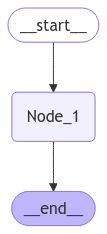

In [ ]:
display(Image(graph.get_graph().draw_mermaid_png()))

In [ ]:
llm_reply = graph.invoke({"prompt" : "Tell me about the current political conditions in Pakistan And India"})
llm_reply

----Node 1------


{'prompt': 'Tell me about the current political conditions in Pakistan And India',
 'output': "Both Pakistan and India are currently facing complex and dynamic political landscapes.  Here's a summary of the current conditions in each country:\n\n**Pakistan:**\n\n* **Political Instability:** Pakistan has a history of political instability, and this continues to be a defining feature.  The country has seen several changes in government in recent years, often marked by periods of intense political maneuvering and sometimes even violence.  The current government, led by Prime Minister Anwaar-ul-Haq Kakar, is a caretaker government appointed after the dissolution of the previous parliament.  The country is preparing for general elections, the date of which is yet to be finalized, and the political climate is highly charged with various political parties vying for power.  The powerful military also plays a significant, albeit often behind-the-scenes, role in Pakistani politics.\n\n* **Econom

In [ ]:
import textwrap
from IPython.display import Markdown

def to_markdown(text)-> Markdown:
    text : str = text.replace("•", "  *")
    return Markdown(textwrap.indent(text, "> ", predicate=lambda _: True))

In [ ]:
to_markdown(llm_reply["output"])

> Both Pakistan and India are currently facing complex and dynamic political landscapes.  Here's a summary of the current conditions in each country:
> 
> **Pakistan:**
> 
> * **Political Instability:** Pakistan has a history of political instability, and this continues to be a defining feature.  The country has seen several changes in government in recent years, often marked by periods of intense political maneuvering and sometimes even violence.  The current government, led by Prime Minister Anwaar-ul-Haq Kakar, is a caretaker government appointed after the dissolution of the previous parliament.  The country is preparing for general elections, the date of which is yet to be finalized, and the political climate is highly charged with various political parties vying for power.  The powerful military also plays a significant, albeit often behind-the-scenes, role in Pakistani politics.
> 
> * **Economic Crisis:** Pakistan is grappling with a severe economic crisis, characterized by high inflation, a depreciating currency, and a significant debt burden.  This has led to widespread public discontent and social unrest.  The government is engaged in negotiations with international financial institutions for bailout packages, but the path to economic recovery remains uncertain.
> 
> * **Social and Religious Tensions:**  Pakistan is a diverse country with significant religious and ethnic divisions.  These tensions sometimes manifest in political conflicts and social unrest.  The government faces the challenge of balancing the needs of different groups while maintaining social cohesion.
> 
> * **Security Concerns:**  Pakistan continues to face security challenges, including terrorism and internal conflicts.  The government is working to address these issues, but the threat remains significant.
> 
> 
> **India:**
> 
> * **Dominant Ruling Party:**  India is currently governed by the Bharatiya Janata Party (BJP), led by Prime Minister Narendra Modi. The BJP has held a strong majority in the national parliament for several years.  While this provides a degree of political stability, it also leads to concerns about the concentration of power and the marginalization of opposition voices.
> 
> * **Rising Religious Polarization:**  Religious polarization is a significant issue in India, particularly between the Hindu majority and the Muslim minority.  This polarization is often reflected in political discourse and social tensions.  The BJP's policies and rhetoric have been criticized by some for exacerbating these divisions.
> 
> * **Economic Growth and Inequality:**  India has experienced significant economic growth in recent years, but this growth has not been evenly distributed.  High levels of inequality persist, and a large portion of the population still lives in poverty.  The government faces the challenge of balancing economic growth with social justice and inclusive development.
> 
> * **Geopolitical Ambitions:**  India is increasingly asserting itself on the global stage, playing a more active role in international affairs and strengthening its strategic partnerships.  This includes its relationship with the United States and other countries in the Indo-Pacific region.  India's relationship with its neighbors, particularly Pakistan and China, remains complex and often tense.
> 
> 
> **In summary:** Both Pakistan and India are facing significant political and economic challenges.  Pakistan is grappling with acute political instability and a severe economic crisis, while India, despite economic growth, faces issues of religious polarization and inequality.  Both countries are navigating complex geopolitical landscapes and internal social divisions.  The future political trajectory of both nations remains uncertain and depends on how effectively their governments address these multifaceted challenges.


In [ ]:
class ConditionalState(TypedDict):
  user_input : str

In [ ]:
def Node_1(state:ConditionalState) -> ConditionalState:
  print("----Node 1------")
  return{"user_input":state["user_input"]+" I am Saim And "}

def Node_2(state:ConditionalState) -> ConditionalState:
  print("-----Node 2-----")
  return{"user_input":state["user_input"]+"I am happy."}

def Node_3(state:ConditionalState) -> ConditionalState:
  print("-----Node 3-----")
  return{"user_input":state["user_input"]+"I am Sad."}


In [ ]:
import random
from typing import Literal

In [ ]:
def choose_mode(state:ConditionalState)->Literal["Node_2","Node_3"]:
  num = random.random()
  if num > 0.5:
    return "Node_2"
  else:
    return "Node_3"

In [ ]:
builder_3 : StateGraph = StateGraph(state_schema=ConditionalState)

In [ ]:
builder_3.add_node("Node_1",Node_1)
builder_3.add_node("Node_2",Node_2)
builder_3.add_node("Node_3",Node_3)

In [ ]:
builder_3.add_edge(START,"Node_1")
builder_3.add_conditional_edges("Node_1",choose_mode)
builder_3.add_edge("Node_2",END)
builder_3.add_edge("Node_3",END)

In [ ]:
graph : CompiledStateGraph = builder_3.compile()

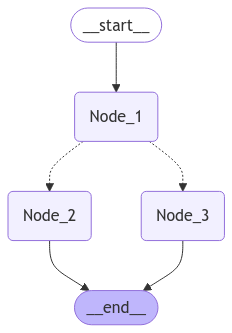

In [ ]:
display(Image(graph.get_graph().draw_mermaid_png()))

In [ ]:
msg = graph.invoke({"user_input":"Hi there !"})

----Node 1------
-----Node 2-----


In [ ]:
msg

{'user_input': 'Hi there ! I am Saim And I am happy.'}

In [ ]:
from pprint import pprint

In [ ]:
from langchain_core.messages import HumanMessage, AIMessage ,SystemMessage

In [ ]:
from os import name
messages = [HumanMessage(content="Hi there, I want to explore Ocean Animals",name = "Human")]
messages.append(AIMessage(content = "Hello, So you are interested in Ocean Animals",name = "AIModel"))
messages.append(HumanMessage(content="Yes thats right",name = "Human"))
messages.append(AIMessage(content="Thats Wonderful, So what you want to know about the Ocean Animals",name = "AIModel"))
messages.append(HumanMessage(content="I want to know the best sites in USA And Japan To See Whale And Salmon Fishing As well"))

In [ ]:
for msg in messages:
  msg.pretty_print()

================================ Human Message =================================
Name: Human

Hi there, I want to explore Ocean Animals
================================== Ai Message ==================================
Name: AIModel

Hello, So you are interested in Ocean Animals
================================ Human Message =================================
Name: Human

Yes thats right
================================== Ai Message ==================================
Name: AIModel

Thats Wonderful, So what you want to know about the Ocean Animals
================================ Human Message =================================

I want to know the best sites in USA And Japan To See Whale And Salmon Fishing As well


In [ ]:
reply = llm.invoke(messages)

In [ ]:
to_markdown(reply.content)

> That's exciting!  Seeing whales and salmon fishing are both incredible experiences.  Let's break down the best sites in the USA and Japan for each:
> 
> **Whale Watching:**
> 
> **USA:**
> 
> * **Alaska:** Arguably the best whale watching in the US.  You can see humpback whales, orcas (killer whales), gray whales, and more, depending on the season and location.  Specific locations include Juneau, Seward, Kenai Fjords National Park, and the Inside Passage.  Cruises are readily available.
> 
> * **California:**  Monterey Bay is famous for its whale watching, particularly gray whales during their migration.  Channel Islands National Park also offers excellent opportunities to see whales, dolphins, and other marine life.
> 
> * **Massachusetts (Cape Cod & Stellwagen Bank):**  Humpback whales are common here, especially during the summer months.  Whale watching tours depart from various towns along the Cape.
> 
> * **Oregon & Washington:** Gray whales migrate along the coast, offering opportunities for sightings.  Orcas are also present in these areas.
> 
> 
> **Japan:**
> 
> * **Hokkaido:**  Known for its diverse whale species, including orcas, minke whales, and humpback whales.  Specific locations like Rausu and Kushiro offer excellent opportunities.  Whale watching tours are common.
> 
> * **Tohoku Region (Pacific Coast):**  This region also offers good chances to see various whale species, depending on the season.
> 
> * **Pacific Ocean side of Honshu:**  While not as consistently reliable as Hokkaido or Tohoku, certain areas along the Pacific coast can offer whale watching opportunities.
> 
> 
> **Salmon Fishing (viewing, not necessarily participating in the fishing itself):**
> 
> **USA:**
> 
> * **Alaska:**  Alaska is the undisputed king of salmon fishing.  You can witness salmon runs in many rivers and streams across the state.  Katmai National Park and Preserve is particularly famous for its brown bear fishing for salmon.  Many lodges and tours offer opportunities to observe the runs.
> 
> * **Pacific Northwest (Oregon & Washington):**  The Columbia River and its tributaries are known for their salmon runs.  You can find viewing areas along the riverbanks.
> 
> * **California:**  While not as prolific as Alaska or the Pacific Northwest, some rivers in California still have salmon runs, though often on a smaller scale.
> 
> 
> **Japan:**
> 
> * **Hokkaido:**  Several rivers in Hokkaido have significant salmon runs, particularly the Shiretoko Peninsula.  You can often see salmon spawning in the rivers.
> 
> * **Tohoku Region:**  Similar to Hokkaido, the Tohoku region also has rivers with salmon runs, though the scale might vary depending on the specific river and season.
> 
> 
> **Important Considerations:**
> 
> * **Seasonality:** Whale watching and salmon runs are highly seasonal.  Research the best times to visit for optimal viewing.
> * **Tour Operators:**  For both whale watching and salmon viewing, reputable tour operators are crucial.  They prioritize responsible wildlife viewing practices.
> * **Respect for Wildlife:**  Maintain a safe distance from whales and other marine life.  Never approach or disturb them.  For salmon, observe from designated viewing areas.
> 
> 
> Before you plan your trip, I strongly recommend researching specific locations within these regions and checking the current conditions and regulations for whale watching and salmon viewing.  Websites dedicated to wildlife tourism and local tourism boards will be invaluable resources.


In [ ]:
system = [
    SystemMessage(content="You are an Helpful Assistant and Your name is Bob"),
    HumanMessage(content="What is your name",name="Human")
]

llm.invoke(system)

AIMessage(content='My name is Bob.\n', additional_kwargs={}, response_metadata={'prompt_feedback': {'block_reason': 0, 'safety_ratings': []}, 'finish_reason': 'STOP', 'safety_ratings': []}, id='run-49d4e562-dcdd-4021-86c6-e7d7fc7c6c97-0', usage_metadata={'input_tokens': 15, 'output_tokens': 6, 'total_tokens': 21, 'input_token_details': {'cache_read': 0}})

In [ ]:
def deposit_money(name:str,deposit_amount:int) -> dict :
  """ A function that simulates depositing money ino an account
  It contains two arguments
  Args:
      name:Account Holder Name (It is Of String Data Type)
      deposit_amount:Amount the user wants to deposit (It is Of Integer Data Type)
  return:
      dict
  """
  return {"Status":f"Success, Amount {deposit_amount} is Deposited into {name} Account "}

In [ ]:
llm_with_tools = llm.bind_tools([deposit_money])

In [ ]:
deposit_money("Saim Hassan",2500000)

{'Status': 'Success, Amount 2500000 is Deposited into Saim Hassan Account '}

In [ ]:
llm_with_tools

RunnableBinding(bound=ChatGoogleGenerativeAI(model='models/gemini-1.5-flash', google_api_key=SecretStr('**********'), temperature=0.0, client=<google.ai.generativelanguage_v1beta.services.generative_service.client.GenerativeServiceClient object at 0x7f4f68be95d0>, default_metadata=()), kwargs={'tools': [{'type': 'function', 'function': {'name': 'deposit_money', 'description': 'A function that simulates depositing money ino an account\nIt contains two arguments\nArgs:\n    name:Account Holder Name (It is Of String Data Type)\n    deposit_amount:Amount the user wants to deposit (It is Of Integer Data Type)\nreturn:\n    dict', 'parameters': {'properties': {'name': {'type': 'string'}, 'deposit_amount': {'type': 'integer'}}, 'required': ['name', 'deposit_amount'], 'type': 'object'}}}]}, config={}, config_factories=[])

In [ ]:
llm.invoke([HumanMessage(content = f"Deposit 200000 in Saim Hassan Account", name="Saim Hassan")])

AIMessage(content="I cannot directly deposit money into a bank account.  I am a large language model, an AI. I do not have access to real-world financial systems or the ability to make transactions.  To deposit money into Saim Hassan's account, you will need to use a bank, online banking system, or other financial institution.\n", additional_kwargs={}, response_metadata={'prompt_feedback': {'block_reason': 0, 'safety_ratings': []}, 'finish_reason': 'STOP', 'safety_ratings': []}, id='run-f8d4e086-2e7a-4fe6-ae2c-e63ace95bd34-0', usage_metadata={'input_tokens': 14, 'output_tokens': 69, 'total_tokens': 83, 'input_token_details': {'cache_read': 0}})

In [ ]:
llm_with_tools.invoke([HumanMessage(content="Deposit 200000 in Saim Account",name="Saim Hassan")])

AIMessage(content='', additional_kwargs={'function_call': {'name': 'deposit_money', 'arguments': '{"deposit_amount": 200000.0, "name": "Saim"}'}}, response_metadata={'prompt_feedback': {'block_reason': 0, 'safety_ratings': []}, 'finish_reason': 'STOP', 'safety_ratings': []}, id='run-920025d2-de5f-4373-afe8-dc60b7d853d8-0', tool_calls=[{'name': 'deposit_money', 'args': {'deposit_amount': 200000.0, 'name': 'Saim'}, 'id': '4aa3b1c0-76ee-4250-81fd-8261c9e4da5f', 'type': 'tool_call'}], usage_metadata={'input_tokens': 118, 'output_tokens': 9, 'total_tokens': 127, 'input_token_details': {'cache_read': 0}})

In [ ]:
class StateDeposite(TypedDict):
  messages : list

def Node_1(state:StateDeposite) -> StateDeposite :
  messages = state["messages"]
  call_response = llm_with_tools.invoke(messages)
  return{"messages":call_response}

builder : StateGraph = StateGraph(state_schema=StateDeposite)

builder.add_node("Node_1",Node_1)

builder.add_edge(START,"Node_1")
builder.add_edge("Node_1",END)

graph : CompiledStateGraph = builder.compile()

In [ ]:
graph.invoke({"messages":[HumanMessage(content="Hi There",name="Saim")]})

{'messages': AIMessage(content='Hello there! How can I help you today?\n', additional_kwargs={}, response_metadata={'prompt_feedback': {'block_reason': 0, 'safety_ratings': []}, 'finish_reason': 'STOP', 'safety_ratings': []}, id='run-5cdcc364-8e39-4ef9-8c81-fee7ea9f92d7-0', usage_metadata={'input_tokens': 108, 'output_tokens': 11, 'total_tokens': 119, 'input_token_details': {'cache_read': 0}})}

In [ ]:
graph.invoke({"messages":[HumanMessage(content="Deposit 25000 in Ali Account",name="Saim")]})

{'messages': AIMessage(content='', additional_kwargs={'function_call': {'name': 'deposit_money', 'arguments': '{"deposit_amount": 25000.0, "name": "Ali"}'}}, response_metadata={'prompt_feedback': {'block_reason': 0, 'safety_ratings': []}, 'finish_reason': 'STOP', 'safety_ratings': []}, id='run-64eadc91-5686-4904-850d-781e0fe52163-0', tool_calls=[{'name': 'deposit_money', 'args': {'deposit_amount': 25000.0, 'name': 'Ali'}, 'id': '8e37af91-4279-48e2-9f01-defd5f478c09', 'type': 'tool_call'}], usage_metadata={'input_tokens': 116, 'output_tokens': 8, 'total_tokens': 124, 'input_token_details': {'cache_read': 0}})}

In [ ]:
def account_balance(name:str,account_number:int) -> dict :
  """"
  A function that gives the user his/her account balance
  It contains two arguments as follows
  Args:
      name : Account Holder Name(It is of string data type)
      account_number : Account number of the Account Holder(It is of integer data type)
  return:
      dict
  """
  return {"Status":f"The Total Balance of Your Account Number {account_number} by your {name} is $10000 "}

In [ ]:
llm_with_tools = llm.bind_tools([account_balance])

In [ ]:
class AccountBalanceState(TypedDict):
  messages : list

def llm_with_tool(state:AccountBalanceState) -> AccountBalanceState :
  messages = state["messages"]
  response = llm_with_tools.invoke(messages)
  return {"messages":response}

builder : StateGraph = StateGraph(state_schema = AccountBalanceState)

builder.add_node("llm_with_tool",llm_with_tool)

builder.add_edge(START,"llm_with_tool")
builder.add_edge("llm_with_tool",END)

graph : CompiledStateGraph = builder.compile()

In [ ]:
response = graph.invoke({"messages":[HumanMessage(content="Tell me my account balance , my name is Saim Hassan and my account number is 2345678",name="Ali Hassan")]})

In [ ]:
response["messages"].response_metadata

{'prompt_feedback': {'block_reason': 0, 'safety_ratings': []},
 'finish_reason': 'STOP',
 'safety_ratings': []}

In [ ]:
def multiply(a:int,b:int) -> int :
  """
  This function is used to multiply the inputs given to it, It has two arguments
  Args:
      a: First Number (It is of integer data type)
      b: Second Number (It is of integer data type)
  return:
      int
  """
  return a*b

In [ ]:
llm_with_tools : ChatGoogleGenerativeAI = llm.bind_tools([multiply])

In [ ]:
function_call = llm_with_tools.invoke([HumanMessage(content="What is 5 times 5",name="Saim Hassan")])
function_call

AIMessage(content='', additional_kwargs={'function_call': {'name': 'multiply', 'arguments': '{"a": 5.0, "b": 5.0}'}}, response_metadata={'prompt_feedback': {'block_reason': 0, 'safety_ratings': []}, 'finish_reason': 'STOP', 'safety_ratings': []}, id='run-eff19849-3d8e-4fa7-9de7-377ecb9fa9c3-0', tool_calls=[{'name': 'multiply', 'args': {'a': 5.0, 'b': 5.0}, 'id': 'ef597da3-a785-44e6-97f8-c9aa7c8724bb', 'type': 'tool_call'}], usage_metadata={'input_tokens': 102, 'output_tokens': 3, 'total_tokens': 105, 'input_token_details': {'cache_read': 0}})

In [ ]:
function_call.response_metadata

{'prompt_feedback': {'block_reason': 0, 'safety_ratings': []},
 'finish_reason': 'STOP',
 'safety_ratings': []}

In [ ]:
function_call.additional_kwargs["function_call"]

{'name': 'multiply', 'arguments': '{"a": 5.0, "b": 5.0}'}

In [ ]:
from langchain_core.messages import AnyMessage
from langgraph.graph import add_messages
from typing_extensions import Annotated
class StateMultiply(TypedDict):
  messages : list[AnyMessage]

In [ ]:
class MultiplyState(TypedDict):
  messages : Annotated[list[AnyMessage],add_messages]

In [ ]:
from langgraph.graph import MessagesState

In [ ]:
class DefaultState(MessagesState):
  pass

In [ ]:
message1 = [AIMessage(content="Hi there , So you are interested in Ocean Animals",name="AIModel"),
            HumanMessage(content="Yes thats right",name="Human")]
message2= [AIMessage(content="Thats Wonderful, So what you want to know about the Ocean Animals",name="AIModel"),
           HumanMessage(content="I want to know the best sites in Alaska To See Whale And Salmon Fishing As well",name="Human")]
add_messages(message1,message2)

[AIMessage(content='Hi there , So you are interested in Ocean Animals', additional_kwargs={}, response_metadata={}, name='AIModel', id='c05530c6-0bb3-4fc7-9d9b-287856a87f15'),
 HumanMessage(content='Yes thats right', additional_kwargs={}, response_metadata={}, name='Human', id='bf870531-7ca0-48da-b53c-807750b1d264'),
 AIMessage(content='Thats Wonderful, So what you want to know about the Ocean Animals', additional_kwargs={}, response_metadata={}, name='AIModel', id='0fcd6f1b-1e17-4cb6-b363-8ce4b31d3a74'),
 HumanMessage(content='I want to know the best sites in Alaska To See Whale And Salmon Fishing As well', additional_kwargs={}, response_metadata={}, name='Human', id='d804add1-7cb7-4330-b5c8-d15be5dbd4d6')]

In [ ]:
def Call_llm_tools(state:DefaultState) -> DefaultState :
  messages = state["messages"]
  reply = llm_with_tools.invoke(messages)
  return {"messages":reply}

builder : StateGraph = StateGraph(state_schema=DefaultState)

builder.add_node("Call_llm_tools",Call_llm_tools)

builder.add_edge(START,"Call_llm_tools")
builder.add_edge("Call_llm_tools",END)

graph :CompiledStateGraph = builder.compile()

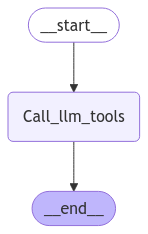

In [ ]:
display(Image(graph.get_graph().draw_mermaid_png()))

In [ ]:
msg = graph.invoke({"messages":[HumanMessage(content='Hi there! How are you', name= "Saim")]})

In [ ]:
for m in msg["messages"]:
  m.pretty_print()

================================ Human Message =================================
Name: Saim

Hi there! How are you
================================== Ai Message ==================================

I'm doing well, thank you for asking! How are you today?


In [ ]:
msg1 = graph.invoke({"messages":[HumanMessage(content="Multiply 5 by 5", name= "Saim")]})

In [ ]:
for m in msg1["messages"]:
  m.pretty_print()

================================ Human Message =================================
Name: Saim

Multiply 5 by 5
================================== Ai Message ==================================
Tool Calls:
  multiply (bc1ff006-7770-483d-99f4-46797b8df6f3)
 Call ID: bc1ff006-7770-483d-99f4-46797b8df6f3
  Args:
    a: 5.0
    b: 5.0


In [ ]:
msg2 = graph.invoke({"messages":[HumanMessage(content="Hi there! How are you", name= "Saim"),
                                 AIMessage(content="I am good , thanks for asking, How are you !", name= "AIModel"),
                                 HumanMessage(content="I am interested in exploring ufc fighters and my name is Saim Hassan", name= "Saim"),
                                 AIMessage(content="Thats Wonderful, So what you want to know about the ufc fighters", name= "AIModel"),
                                 HumanMessage(content="How to become a ufc fighter as I am 25 years old", name= "Saim")
                                 ]})

In [ ]:
for m in msg2["messages"]:
  m.pretty_print()

================================ Human Message =================================
Name: Saim

Hi there! How are you
================================== Ai Message ==================================
Name: AIModel

I am good , thanks for asking, How are you !
================================ Human Message =================================
Name: Saim

I am interested in exploring ufc fighters and my name is Saim Hassan
================================== Ai Message ==================================
Name: AIModel

Thats Wonderful, So what you want to know about the ufc fighters
================================ Human Message =================================
Name: Saim

How to become a ufc fighter as I am 25 years old
================================== Ai Message ==================================

Becoming a UFC fighter is a challenging but achievable goal, even at 25.  Here's a breakdown of the steps involved:

**1. Assess Your Physical Condition and Skills:**

* **Martial Arts Training:** 

In [ ]:
def power_of(num1:int,num2:int) -> int :
  """
  The above is used to calculate the raise to power of an integer, the second integer passed as argument is set as the exponent to
  the first integer passed as an argument and the result is returned , it has 2 arguments
  Agrs:
      num1:First Number (It is of integer data type)
      num2:Second Number (It is of integer data type)
  return:
      int
  """
  return num1**num2

In [ ]:
llm_with_tools : ChatGoogleGenerativeAI = llm.bind_tools([power_of])

In [ ]:
def tool_with_llm(state:MessagesState) -> MessagesState :
  return{"messages":[llm_with_tools.invoke(state["messages"])]}

In [ ]:
builder : StateGraph = StateGraph(state_schema=MessagesState)

In [ ]:
from langgraph.prebuilt import ToolNode,tools_condition

In [ ]:
builder.add_node("tools_with_llm",tool_with_llm)
builder.add_node("tools",ToolNode([power_of]))
builder.add_edge(START,"tools_with_llm")
builder.add_conditional_edges("tools_with_llm",tools_condition)
builder.add_edge("tools",END)

In [ ]:
graph : CompiledStateGraph = builder.compile()

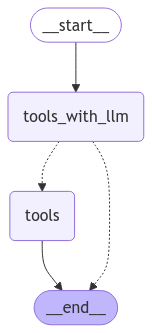

In [ ]:
display(Image(graph.get_graph().draw_mermaid_png()))

In [ ]:
def multiply(a:int,b:int) -> int :
  """
  This function is used to multiply the inputs given to it, It has two arguments
  Args:
      a: First Number (It is of integer data type)
      b: Second Number (It is of integer data)
  return:
      a*b (integer data type)"""
  return  a*b

In [ ]:
llm_with_all_tools = llm.bind_tools([multiply])

In [ ]:
builder2 = StateGraph(state_schema=MessagesState)

In [ ]:
def Node_multi(state:MessagesState):
  return{"messages":[llm_with_all_tools.invoke(state["messages"])]}

In [ ]:
builder2.add_node("Node_multi",Node_multi)
builder2.add_node("tools",ToolNode([multiply]))
builder2.add_edge(START,"Node_multi")
builder2.add_conditional_edges("Node_multi",tools_condition)
builder2.add_edge("tools",END)

In [ ]:
graph : CompiledStateGraph = builder2.compile()

In [ ]:
graph.invoke({"messages":[HumanMessage(content="What is 5 times 5", name="Saim")]})

{'messages': [HumanMessage(content='What is 5 times 5', additional_kwargs={}, response_metadata={}, name='Saim', id='45c7acb9-a0dc-4c6e-bad0-dbfb3b6cf3bc'),
  AIMessage(content='', additional_kwargs={'function_call': {'name': 'multiply', 'arguments': '{"a": 5.0, "b": 5.0}'}}, response_metadata={'prompt_feedback': {'block_reason': 0, 'safety_ratings': []}, 'finish_reason': 'STOP', 'safety_ratings': []}, id='run-204468b5-ada9-47a8-848b-8b02ac24ec30-0', tool_calls=[{'name': 'multiply', 'args': {'a': 5.0, 'b': 5.0}, 'id': '0232cbd3-1a96-4140-b03b-7ac2edf8278d', 'type': 'tool_call'}], usage_metadata={'input_tokens': 108, 'output_tokens': 3, 'total_tokens': 111, 'input_token_details': {'cache_read': 0}}),
  ToolMessage(content='25', name='multiply', id='86d84448-29f4-4bb5-b1c3-85f330bbc35e', tool_call_id='0232cbd3-1a96-4140-b03b-7ac2edf8278d')]}

# Calculator Function Calling

In [ ]:
def Multiple(a:int,b:int) -> int :
  """
  The above function is used to multiply the the two inputs given to it, it has two arguments
  Args:
      a: First Number (It is of integer data type)
      b: Second Number (It is of integer data type)
  return:
      a*b (integer data type)
  """
  return a*b


def Division(a:int,b:int) -> int :
  """
  The above function is used to divide the two inputs given to it, it has two arguments
  Args:
      a: First Number (It is of integer data type)
      b: Second Number (It is of integer data type)
  return:
      a/b (integer data type)
  """
  return a/b

def Addition(a:int,b:int) -> int :
  """
  The above function is used to add the two inputs given to it, it has two arguments
  Args:
      a: First Number (It is of integer data type)
      b: Second Number (It is of integer data type)
  return:
      a+b (integer data type)
  """
  return a+b

def Subtraction(a:int,b:int) -> int :
  """
  The above function is used to subtract the two inputs given to it, it has two arguments
  Args:
      a: First Number (It is of integer data type)
      b: Second Number (It is of integer data type)
  return:
      a-b (integer data type)
  """
  return a-b

tools = [Multiple,Division,Addition,Subtraction]

In [ ]:
sys_msg = SystemMessage(content="You are an assistant that helps in assisting arthmetic operations",name="System")

In [ ]:
tools_of_llm : ChatGoogleGenerativeAI = llm.bind_tools(tools)

In [ ]:
def Node_Arth(state:MessagesState) -> MessagesState :
  return{"messages":[tools_of_llm.invoke([sys_msg] + state["messages"])]}

In [ ]:
builder333 : StateGraph = StateGraph(state_schema=MessagesState)

In [ ]:
builder333.add_node("Node_Arth",Node_Arth)
builder333.add_node("tools",ToolNode(tools))

In [ ]:
builder333.add_edge(START,"Node_Arth")
builder333.add_conditional_edges("Node_Arth",tools_condition)
builder333.add_edge("tools","Node_Arth")

In [ ]:
graph :CompiledStateGraph = builder333.compile()

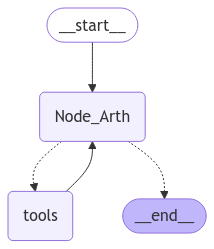

In [ ]:
display(Image(graph.get_graph().draw_mermaid_png()))

In [ ]:
r1 = graph.invoke({"messages":[HumanMessage(content="Calculate 10 times 10",name="Saim")]})

In [ ]:
for m in r1["messages"]:
  m.pretty_print()

================================ Human Message =================================
Name: Saim

Calculate 10 times 10
================================== Ai Message ==================================
Tool Calls:
  Multiple (47d36da7-a8ca-48a0-818e-01b75c4134c5)
 Call ID: 47d36da7-a8ca-48a0-818e-01b75c4134c5
  Args:
    a: 10.0
    b: 10.0
================================= Tool Message =================================
Name: Multiple

100
================================== Ai Message ==================================

The answer is 100.


In [ ]:
r2 = graph.invoke({"messages":[HumanMessage(content="Tell me about Bears",name="Saim")]})

In [ ]:
for m in r2["messages"]:
  m.pretty_print()

================================ Human Message =================================
Name: Saim

Tell me about Bears
================================== Ai Message ==================================

I don't have information about bears. I am a large language model that can perform arithmetic operations using the provided Python libraries.  I cannot access external websites or specific files to retrieve information about bears or any other topic beyond my programming.


In [ ]:
r3 = graph.invoke({"messages":[HumanMessage(content="Calculate 100 divided by 10 , then subtract the result of division by 5 at last divide the output by 5 in the final result ",name="Saim")]})

In [ ]:
for m in r3["messages"]:
  m.pretty_print()

================================ Human Message =================================
Name: Saim

Calculate 100 divided by 10 , then subtract the result of division by 5 at last divide the output by 5 in the final result 
================================== Ai Message ==================================
Tool Calls:
  Division (dcbab560-bd1d-4f10-9818-74e6bcdebe29)
 Call ID: dcbab560-bd1d-4f10-9818-74e6bcdebe29
  Args:
    a: 100.0
    b: 10.0
  Subtraction (960f513f-651a-4c43-86e0-09a44648b159)
 Call ID: 960f513f-651a-4c43-86e0-09a44648b159
  Args:
    a: 10.0
    b: 5.0
  Division (77e57a5e-c108-4e95-a456-4d0d821ab178)
 Call ID: 77e57a5e-c108-4e95-a456-4d0d821ab178
  Args:
    a: 5.0
    b: 5.0
================================= Tool Message =================================
Name: Division

10.0
================================= Tool Message =================================
Name: Subtraction

5
================================= Tool Message =================================
Name: Division

1

In [ ]:
r7 = graph.invoke({"messages":[HumanMessage(content="Calculate 100 divided by 10 , and add 10 and 20 ",name="Saim")]})

In [ ]:
for m in r7["messages"]:
  m.pretty_print()

================================ Human Message =================================
Name: Saim

Calculate 100 divided by 10 , and add 10 and 20 
================================== Ai Message ==================================
Tool Calls:
  Division (e110ba40-06a7-4f29-a871-14db0d49a1f6)
 Call ID: e110ba40-06a7-4f29-a871-14db0d49a1f6
  Args:
    a: 100.0
    b: 10.0
  Addition (84ffa49b-0e5b-4b0b-a183-94128f5b9e57)
 Call ID: 84ffa49b-0e5b-4b0b-a183-94128f5b9e57
  Args:
    a: 10.0
    b: 20.0
================================= Tool Message =================================
Name: Division

10.0
================================= Tool Message =================================
Name: Addition

30
================================== Ai Message ==================================

The result of 100 divided by 10 is 10. The result of adding 10 and 20 is 30.


In [ ]:
r9 = graph.invoke({"messages":[HumanMessage(content="First Calculate 100 divided by 10 ,then secondly add 100 into the output of the division ",name="Saim")]})

In [ ]:
for m in r9["messages"]:
  m.pretty_print()

================================ Human Message =================================
Name: Saim

First Calculate 100 divided by 10 ,then secondly add 100 into the output of the division 
================================== Ai Message ==================================
Tool Calls:
  Division (25f87fd4-499c-4c98-9d1a-df148c76bd40)
 Call ID: 25f87fd4-499c-4c98-9d1a-df148c76bd40
  Args:
    a: 100.0
    b: 10.0
  Addition (84920eca-2333-4cab-a438-c2e8679874d3)
 Call ID: 84920eca-2333-4cab-a438-c2e8679874d3
  Args:
    a: 100.0
    b: 10.0
================================= Tool Message =================================
Name: Division

10.0
================================= Tool Message =================================
Name: Addition

110
================================== Ai Message ==================================

First, 100 divided by 10 is 10.  Secondly, adding 100 to the result (10) gives 110.


In [ ]:
r10 = graph.invoke({"messages":[HumanMessage(content="First Calculate 100 divided by 10 ,then secondly add 100 into the output of the division , and at the end multiply the given output from addition by 5 and give the end result",name="Saim")]})

In [ ]:
for r10 in r10["messages"]:
  r10.pretty_print()

================================ Human Message =================================
Name: Saim

First Calculate 100 divided by 10 ,then secondly add 100 into the output of the division , and at the end multiply the given output from addition by 5 and give the end result
================================== Ai Message ==================================
Tool Calls:
  Division (40095a22-70f8-4db8-889a-ae64842e3e56)
 Call ID: 40095a22-70f8-4db8-889a-ae64842e3e56
  Args:
    a: 100.0
    b: 10.0
  Addition (44f757b9-6d17-44e9-8680-b5965adada44)
 Call ID: 44f757b9-6d17-44e9-8680-b5965adada44
  Args:
    a: 100.0
    b: 10.0
  Multiple (374cd5bb-ec5c-4722-b1dd-df9cba8daef0)
 Call ID: 374cd5bb-ec5c-4722-b1dd-df9cba8daef0
  Args:
    a: 110.0
    b: 5.0
================================= Tool Message =================================
Name: Division

10.0
================================= Tool Message =================================
Name: Addition

110
================================= Tool Message 

In [ ]:
def addition(a:int,b:int) -> int:
  """
  This function is used to add the two inputs given to it, it has 2 arguments
  Args:
      a:First Number (It is of integer data type)
      b:Second Number (It is of integer data type)
  return:
      a+b (integer data type)
  """
  return a+b

def muliplication(a:int,b:int)->int:
  """
  This function is used to multiply the two inputs given to it, it has 2 arguments
  Args:
      a:First Number (It is of integer data type)
      b:Second Number (It is of integer data type)
  return:
      a*b (integer data type)
  """
  return a*b

def division(a:int,b:int)->int:
  """
  This function is used to divide the two inputs given to it, it has 2 arguments
  Args:
      a:First Number (It is of integer data type)
      b:Second Number (It is of integer data type)
  return:
      a/b (integer data type)
  """
  return a/b

def subtraction(a:int,b:int)->int:
  """
  This function is used to subtract the two inputs given to it, it has 2 arguments
  Args:
      a:First Number (It is of integer data type)
      b:Second Number (It is of integer data type)
  return:
      a-b (integer data type)
  """
  return a-b

tools = [addition,muliplication,division,subtraction]

sos = SystemMessage(content="You are an helpful assistant that performs arithmatic operations on the guven inputs")

In [ ]:
llm_at_tools : ChatGoogleGenerativeAI = llm.bind_tools(tools)

In [ ]:
def Node_all(state:MessagesState)->MessagesState:
  return {"messages":llm_at_tools.invoke([sos]+state["messages"])}

In [ ]:
builder21 : StateGraph = StateGraph(state_schema=MessagesState)

In [ ]:
builder21.add_node("Node_all",Node_all)
builder21.add_node("tools",ToolNode(tools))

In [ ]:
builder21.add_edge(START,"Node_all")
builder21.add_conditional_edges("Node_all",tools_condition)
builder21.add_edge("tools","Node_all")

In [ ]:
graph1 : CompiledStateGraph = builder21.compile()

In [ ]:
ios = graph1.invoke({"messages":[HumanMessage(content="At First only Calculate 10 times 10 and don't use addition first , then at last in the output of multiplication add 100 ",name="Saim")]})

In [ ]:
for m in ios["messages"]:
  m.pretty_print()

================================ Human Message =================================
Name: Saim

At First only Calculate 10 times 10 and don't use addition first , then at last in the output of multiplication add 100 
================================== Ai Message ==================================
Tool Calls:
  muliplication (27b5a52d-16c3-498b-8bfa-4b8f1bdd203d)
 Call ID: 27b5a52d-16c3-498b-8bfa-4b8f1bdd203d
  Args:
    a: 10.0
    b: 10.0
  addition (7d608942-d648-4fdb-bc20-c091d1d9f4bd)
 Call ID: 7d608942-d648-4fdb-bc20-c091d1d9f4bd
  Args:
    a: 100.0
    b: 100.0
================================= Tool Message =================================
Name: muliplication

100
================================= Tool Message =================================
Name: addition

200
================================== Ai Message ==================================

At first, 10 multiplied by 10 is 100. Then, adding 100 to the result of the multiplication gives 200.


In [ ]:
i2 = graph1.invoke({"messages":[HumanMessage(content="Multiply that by 10",name="Saim")]})

In [ ]:
for m in i2["messages"]:
  m.pretty_print()

================================ Human Message =================================
Name: Saim

Multiply that by 10
================================== Ai Message ==================================

What values would you like me to multiply by 10?  Please provide the numbers.


In [ ]:
from langgraph.checkpoint.memory import MemorySaver
memory : MemorySaver = MemorySaver()

In [ ]:
graph1:CompiledStateGraph = builder21.compile(checkpointer=memory)
config1={"configurable":{"thread_id":"1"}}

In [ ]:
ros = graph1.invoke({"messages":[HumanMessage(content="Add 10 into 20",name= "Saim")]},config1)

In [ ]:
for m in ros["messages"]:
  m.pretty_print()

================================ Human Message =================================
Name: Saim

Add 10 into 20
================================== Ai Message ==================================
Tool Calls:
  addition (a2c0914f-0257-4f12-9ddf-d640654e7e1d)
 Call ID: a2c0914f-0257-4f12-9ddf-d640654e7e1d
  Args:
    a: 10.0
    b: 20.0
================================= Tool Message =================================
Name: addition

30
================================== Ai Message ==================================

The sum of 10 and 20 is 30.


In [ ]:
ros2 = graph1.invoke({"messages":[HumanMessage(content="Multiply that by 20",name= "Saim")]},config1)

In [ ]:
for m in ros2["messages"]:
  m.pretty_print()

================================ Human Message =================================
Name: Saim

Add 10 into 20
================================== Ai Message ==================================
Tool Calls:
  addition (a2c0914f-0257-4f12-9ddf-d640654e7e1d)
 Call ID: a2c0914f-0257-4f12-9ddf-d640654e7e1d
  Args:
    a: 10.0
    b: 20.0
================================= Tool Message =================================
Name: addition

30
================================== Ai Message ==================================

The sum of 10 and 20 is 30.
================================ Human Message =================================
Name: Saim

Multiply that by 20
================================== Ai Message ==================================
Tool Calls:
  muliplication (041ee301-b9ca-4f70-9a9f-cfd19d47038b)
 Call ID: 041ee301-b9ca-4f70-9a9f-cfd19d47038b
  Args:
    a: 30.0
    b: 20.0
================================= Tool Message =================================
Name: muliplication

600
==============

In [ ]:
ros2 = graph1.invoke({"messages":[HumanMessage(content="Divide that by 60",name= "Saim")]},config1)

In [ ]:
for m in ros2["messages"]:
  m.pretty_print()

================================ Human Message =================================
Name: Saim

Add 10 into 20
================================== Ai Message ==================================
Tool Calls:
  addition (a2c0914f-0257-4f12-9ddf-d640654e7e1d)
 Call ID: a2c0914f-0257-4f12-9ddf-d640654e7e1d
  Args:
    a: 10.0
    b: 20.0
================================= Tool Message =================================
Name: addition

30
================================== Ai Message ==================================

The sum of 10 and 20 is 30.
================================ Human Message =================================
Name: Saim

Multiply that by 20
================================== Ai Message ==================================
Tool Calls:
  muliplication (041ee301-b9ca-4f70-9a9f-cfd19d47038b)
 Call ID: 041ee301-b9ca-4f70-9a9f-cfd19d47038b
  Args:
    a: 30.0
    b: 20.0
================================= Tool Message =================================
Name: muliplication

600
==============

In [ ]:
ros4= graph1.invoke({"messages":[HumanMessage(content="Tell me about something about that number",name= "Saim")]},config1)

In [ ]:
for m in ros4["messages"]:
  m.pretty_print()

================================ Human Message =================================
Name: Saim

Add 10 into 20
================================== Ai Message ==================================
Tool Calls:
  addition (a2c0914f-0257-4f12-9ddf-d640654e7e1d)
 Call ID: a2c0914f-0257-4f12-9ddf-d640654e7e1d
  Args:
    a: 10.0
    b: 20.0
================================= Tool Message =================================
Name: addition

30
================================== Ai Message ==================================

The sum of 10 and 20 is 30.
================================ Human Message =================================
Name: Saim

Multiply that by 20
================================== Ai Message ==================================
Tool Calls:
  muliplication (041ee301-b9ca-4f70-9a9f-cfd19d47038b)
 Call ID: 041ee301-b9ca-4f70-9a9f-cfd19d47038b
  Args:
    a: 30.0
    b: 20.0
================================= Tool Message =================================
Name: muliplication

600
==============

In [ ]:
!pip install langgraph_sdk

In [ ]:
from langgraph_sdk import get_client

In [ ]:
URL = "https://380a-103-151-43-15.ngrok-free.app"
client = get_client(url=URL)

In [ ]:
assistants =   client.assistants.search()

In [ ]:
await assistants

[{'assistant_id': 'fe096781-5601-53d2-b2f6-0d3403f7e9ca',
  'graph_id': 'agent',
  'created_at': '2024-12-02T09:25:45.833162+00:00',
  'updated_at': '2024-12-02T09:25:45.833162+00:00',
  'config': {},
  'metadata': {'created_by': 'system'},
  'version': 1,
  'name': 'agent'},
 {'assistant_id': '228f9934-0cdd-5383-92c8-ee8422522cc2',
  'graph_id': 'router',
  'created_at': '2024-12-02T09:25:45.493192+00:00',
  'updated_at': '2024-12-02T09:25:45.493192+00:00',
  'config': {},
  'metadata': {'created_by': 'system'},
  'version': 1,
  'name': 'router'},
 {'assistant_id': '28d99cab-ad6c-5342-aee5-400bd8dc9b8b',
  'graph_id': 'simple_graph',
  'created_at': '2024-12-02T09:25:38.437791+00:00',
  'updated_at': '2024-12-02T09:25:38.437791+00:00',
  'config': {},
  'metadata': {'created_by': 'system'},
  'version': 1,
  'name': 'simple_graph'}]

In [ ]:
thread = await client.threads.create()

In [ ]:
thread

{'thread_id': 'b7d3c35a-4d43-4a76-adf9-72a98d2148e1',
 'created_at': '2024-12-02T11:14:02.394676+00:00',
 'updated_at': '2024-12-02T11:14:02.394676+00:00',
 'metadata': {},
 'status': 'idle',
 'config': {},
 'values': None,
 'interrupts': {}}

In [ ]:
from langchain_core.messages import HumanMessage
input = {"messages":[HumanMessage(content="Hi, How you doing",name = "Saim")]}

In [ ]:
async for chunks in client.runs.stream(
    thread["thread_id"],
    "agent",
    input = input,
    stream_mode = "events"
   ):
   if chunks.data and chunks.event != "metadata":
    print(chunks)


StreamPart(event='events', data={'event': 'on_chain_start', 'data': {'input': {'messages': [{'id': None, 'name': 'Saim', 'type': 'human', 'content': 'Hi, How you doing', 'example': False, 'additional_kwargs': {}, 'response_metadata': {}}]}}, 'name': 'agent', 'tags': [], 'run_id': '1efb0a02-e426-6cc5-9199-0311c3bd7b1b', 'metadata': {'created_by': 'system', 'run_attempt': 1, 'langgraph_version': '0.2.53', 'langgraph_plan': 'developer', 'langgraph_host': 'self-hosted', 'run_id': '1efb0a02-e426-6cc5-9199-0311c3bd7b1b', 'user_id': '', 'graph_id': 'agent', 'thread_id': 'b7d3c35a-4d43-4a76-adf9-72a98d2148e1', 'assistant_id': 'fe096781-5601-53d2-b2f6-0d3403f7e9ca', 'x-forwarded-for': '34.16.196.97', 'x-forwarded-host': '380a-103-151-43-15.ngrok-free.app', 'x-forwarded-proto': 'https'}, 'parent_ids': []})
StreamPart(event='events', data={'event': 'on_chain_start', 'data': {'input': {'messages': [{'content': 'Hi, How you doing', 'additional_kwargs': {'example': False, 'additional_kwargs': {}, 'r

In [ ]:
async for chunks in client.runs.stream(
    thread["thread_id"],
    "agent",
    input=input1,
    stream_mode="values"
  ):
  if chunks.data and chunks.event != "metadata":
    print(chunks.data["messages"][-1])

{'content': 'What is 10 times 10', 'additional_kwargs': {'example': False, 'additional_kwargs': {}, 'response_metadata': {}}, 'response_metadata': {}, 'type': 'human', 'name': 'Saim', 'id': '69b6d39a-df8d-49e7-bf78-87170763cfe2', 'example': False}
{'content': '', 'additional_kwargs': {'function_call': {'name': 'multiply', 'arguments': '{"a": 10.0, "b": 10.0}'}}, 'response_metadata': {'prompt_feedback': {'block_reason': 0, 'safety_ratings': []}, 'finish_reason': 'STOP', 'safety_ratings': []}, 'type': 'ai', 'name': None, 'id': 'run-b51ae71d-57df-424b-a3e6-44442309b241-0', 'example': False, 'tool_calls': [{'name': 'multiply', 'args': {'a': 10.0, 'b': 10.0}, 'id': '55a9d65d-2783-4c8f-81a3-bbc03af83ba1', 'type': 'tool_call'}], 'invalid_tool_calls': [], 'usage_metadata': {'input_tokens': 249, 'output_tokens': 3, 'total_tokens': 252, 'input_token_details': {'cache_read': 0}}}
{'content': '100', 'additional_kwargs': {}, 'response_metadata': {}, 'type': 'tool', 'name': 'multiply', 'id': 'a2db54

In [ ]:
input1 = {"messages":[HumanMessage(content="What is 10 times 10",name="Saim")]}

In [ ]:
from pydantic import BaseModel, field_validator, ValidationError

In [ ]:
class PydanticState(BaseModel):
  name:str
  mood:Literal["Happy","Sad"]

  @field_validator("mood")
  @classmethod
  def validation(cls,value):
    if value not in ["Happy","Sad"]:
      raise ValueError("Mood must be either Happy or Sad")
    return value

In [ ]:
try:
  state : PydanticState = PydanticState(name="Saim Hassan",mood="MAd")
  print(state)
except ValidationError as e:
  print("ValidationError : ",e)

ValidationError :  1 validation error for PydanticState
mood
  Input should be 'Happy' or 'Sad' [type=literal_error, input_value='MAd', input_type=str]
    For further information visit https://errors.pydantic.dev/2.9/v/literal_error


In [ ]:
try:
  state : PydanticState = PydanticState(name="Saim Hassan",mood="Happy")
  print(state)
except ValidationError as e:
  print(ValidationError,e)

name='Saim Hassan' mood='Happy'


In [ ]:
def Node_1(state:PydanticState) -> PydanticState :
  print("......Node 1.......",state)
  return {"name":state.name + " is"}

def Node_2(state:PydanticState)->PydanticState:
  print("......Node 2.......",state)
  return {"mood": " Happy"}

def Node_3(state:PydanticState) -> PydanticState:
  print("......Node 3.......",state)
  return{"mood": "Sad"}

def decide(state:PydanticState)->Literal["Node_2","Node_3"] :
  import random
  if random.random() > 0.5:
    return "Node_2"
  else:
    return "Node_3"

builder : StateGraph = StateGraph(state_schema=PydanticState)

builder.add_node("Node_1",Node_1)
builder.add_node("Node_2",Node_2)
builder.add_node("Node_3",Node_3)

builder.add_edge(START,"Node_1")
builder.add_conditional_edges("Node_1",decide)
builder.add_edge("Node_2",END)
builder.add_edge("Node_3",END)

graph : CompiledStateGraph = builder.compile()

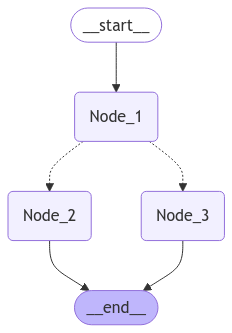

In [ ]:
display(Image(graph.get_graph().draw_mermaid_png()))

In [ ]:
graph.invoke({"name":"Saim","mood":"Sad"})

......Node 1....... name='Saim' mood='Sad'
......Node 2....... name='Saim is' mood='Sad'


{'name': 'Saim is', 'mood': ' Happy'}

In [ ]:
!pip install langchain_community tavily_python

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 31.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 54.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.5/49.5 kB 3.4 MB/s eta 0:00:00


In [ ]:
import os
from google.colab import userdata
TAVILY_API_KEY = userdata.get("TAVILY_API_KEY")
os.environ["TAVILY_API_KEY"] = TAVILY_API_KEY

from langchain_community.tools.tavily_search import TavilySearchResults
tavily_search = TavilySearchResults(max_results=3)

In [ ]:
from langchain_core.tools import tool
@tool
def multi(a:int,b:int)->int:
  """
  The function is used to multiply the two inputs given to it, it has two arguments
  Args:
      a: First Number (It is of integer data type)
      b: Second Number (It is of integer data type)
  return:
      a*b (integer data type)
  """
  return a*b

In [ ]:
tools = [multi]
from langgraph.prebuilt import ToolNode
tool_node : ToolNode = ToolNode(tools)

In [ ]:
llm_with_tools = llm.bind_tools(tools)

In [ ]:
import operator
from langchain_core.messages import BaseMessage
from pydantic import BaseModel
from typing import Annotated,Sequence

In [ ]:
class Pydantic(BaseModel):
  messages : Annotated[Sequence[BaseMessage],operator.add]

In [ ]:
def should(state:Pydantic)->Literal["go","stop"]:
  messages = state.messages
  last_mg = messages[-1]
  if not last_mg.tool_calls:
    return "end"
  else:
    return "go"

In [ ]:
def Node_111(state:Pydantic)->Pydantic:
  messages = state.messages
  reply = llm_with_tools.invoke(messages)
  return {"messages":[reply]}

In [ ]:
flow : StateGraph = StateGraph(state_schema=Pydantic)

In [ ]:
flow.add_node("agent",Node_111)
flow.add_node("tools",tool_node)

In [ ]:
flow.add_edge(START,"agent")
flow.add_conditional_edges("agent",should,{"go":"tools","end":END})
flow.add_edge("tools","agent")

In [ ]:
graphy = flow.compile()

In [ ]:
rip = graphy.invoke({"messages":[HumanMessage(content="Calculate 10 times 10",name="Saim")]})

In [ ]:
for m in rip["messages"]:
  m.pretty_print()

================================ Human Message =================================
Name: Saim

Calculate 10 times 10
================================== Ai Message ==================================
Tool Calls:
  multi (9ae18229-729b-4759-af07-6140e0856ccc)
 Call ID: 9ae18229-729b-4759-af07-6140e0856ccc
  Args:
    a: 10.0
    b: 10.0
================================= Tool Message =================================
Name: multi

100
================================== Ai Message ==================================

The result is 100.


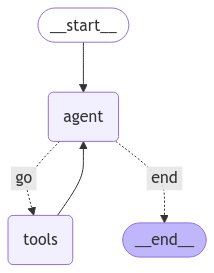

In [ ]:
display(Image(graphy.get_graph().draw_mermaid_png()))

In [ ]:
rip2 = graphy.invoke({"messages":[HumanMessage(content="Diff btw summer and winter",name="Saim")]})

In [ ]:
for m in rip2["messages"]:
  m.pretty_print()

================================ Human Message =================================
Name: Saim

Diff btw summer and winter
================================== Ai Message ==================================

Summer and winter are characterized by opposite weather conditions. Summer is typically warmer with longer days and shorter nights, while winter is colder with shorter days and longer nights.  These differences are due to the tilt of the Earth's axis relative to its orbit around the sun.


In [ ]:
class SimpleState(BaseModel):
  foo : int

def Node_1(state:SimpleState)->SimpleState:
  print("......Node 1.....")
  return {"foo":state.foo + 1 }

def Node_2(state:SimpleState)->SimpleState:
  print(".....Node 2.....")
  return {"foo":state.foo + 1}

def Node_3(state:SimpleState)->SimpleState:
  print("......Node 3.....")
  return {"foo":state.foo + 1}

builder = StateGraph(state_schema=SimpleState)

builder.add_node("Node_1",Node_1)
builder.add_node("Node_2",Node_2)
builder.add_node("Node_3",Node_3)

builder.add_edge(START,"Node_1")
builder.add_edge("Node_1","Node_2")
builder.add_edge("Node_1","Node_3")
builder.add_edge("Node_2",END)
builder.add_edge("Node_3",END)

graph : CompiledStateGraph = builder.compile()

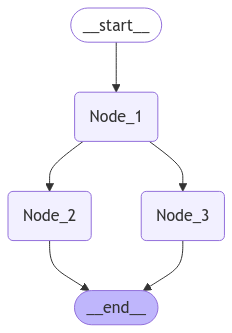

In [ ]:
display(Image(graph.get_graph().draw_mermaid_png()))

In [ ]:
from langgraph.errors import InvalidUpdateError
try:
  graph.invoke({"foo":1})
except InvalidUpdateError as e:
  print(InvalidUpdateError,e)


......Node 1.....
.....Node 2.....
......Node 3.....
<class 'langgraph.errors.InvalidUpdateError'> At key 'foo': Can receive only one value per step. Use an Annotated key to handle multiple values.
For troubleshooting, visit: https://python.langchain.com/docs/troubleshooting/errors/INVALID_CONCURRENT_GRAPH_UPDATE


In [ ]:
import operator
from operator import add
from typing import Annotated

class SamState(BaseModel):
  foo : Annotated[list[int],operator.add]

def Node_1(state:SamState)->SamState:
  print("......Node 1.....")
  return {"foo":[state.foo[-1]+1]}

def Node_2(state:SamState)->SamState:
  print(".....Node 2.....")
  return {"foo":[state.foo[-1]+1]}

def Node_3(state:SamState)->SamState:
  print("......Node 3.....")
  return {"foo":[state.foo[-1]+1]}

builder1 = StateGraph(state_schema=SamState)

builder1.add_node("Node_1",Node_1)
builder1.add_node("Node_2",Node_2)
builder1.add_node("Node_3",Node_3)

builder1.add_edge(START,"Node_1")
builder1.add_edge("Node_1","Node_2")
builder1.add_edge("Node_1","Node_3")
builder1.add_edge("Node_2",END)
builder1.add_edge("Node_3",END)

graph1 : CompiledStateGraph = builder1.compile()

In [ ]:
try:
  graph1.invoke({"foo":[1]})
except InvalidUpdateError as e:
  print(InvalidUpdateError,e)

......Node 1.....
.....Node 2.....
......Node 3.....


In [ ]:
graph1.invoke({"foo":[1]})

......Node 1.....
.....Node 2.....
......Node 3.....


{'foo': [1, 2, 3, 3]}

In [ ]:
def reducer(left: list | None , right : list | None)->list:
  if not left :
    left = []
  if not right :
    right = []
  return left + right

class staty(BaseModel):
  foo:Annotated[list[int],reducer]

class old(BaseModel):
  foo:Annotated[list[int],add]

In [ ]:
def Node_1(state:staty)->staty:
  print("......Node 1.....")
  return {"foo":[2]}

build = StateGraph(state_schema=staty)

build.add_node("Node_1",Node_1)

build.add_edge(START,"Node_1")
build.add_edge("Node_1",END)

graph2 : CompiledStateGraph = build.compile()

In [ ]:
def Node_2(state:old)->old:
  print("......Node 2.....")
  return {"foo":[2]}

build1 = StateGraph(state_schema=old)

build1.add_node("Node_2",Node_2)

build1.add_edge(START,"Node_2")
build1.add_edge("Node_2",END)

graph3 : CompiledStateGraph = build1.compile()

In [ ]:
graph2.invoke({"foo":None})

......Node 1.....


{'foo': [2]}

In [ ]:
try:
   graph3.invoke({"foo":None})
except TypeError as e:
  print("TypeError Ocurred : " ,e)

TypeError Ocurred :  can only concatenate list (not "NoneType") to list


In [ ]:
from langgraph.graph import MessagesState
from langgraph.graph.message import add_messages
from langchain_core.messages import AnyMessage, HumanMessage, AIMessage

In [ ]:
class new(MessagesState):
  id_1 : str
  id_2 : str

class new1(BaseModel):
  messages : Annotated[list[AnyMessage],add_messages]
  id_1 : str
  id_2 : str

In [ ]:
initial_msg = [HumanMessage(content="Hi , How are you !",name="Saim"),
               AIMessage(content="I am Good, How can I help you ?",name="AI")]

new_msg = [HumanMessage(content="I want to study about Marine Biology",name= "Saim")]

add_messages(initial_msg,new_msg)

[HumanMessage(content='Hi , How are you !', additional_kwargs={}, response_metadata={}, name='Saim', id='9209dcd7-3da7-4794-aead-06bd178efd99'),
 AIMessage(content='I am Good, How can I help you ?', additional_kwargs={}, response_metadata={}, name='AI', id='23f6452b-51bf-4627-ab2b-54f4fa0ef554'),
 HumanMessage(content='I want to study about Marine Biology', additional_kwargs={}, response_metadata={}, name='Saim', id='f2353011-e974-4eec-b1b7-b82ff9109190')]

In [ ]:
msg_1 = [HumanMessage(content="Hi , How are you !",name="Saim",id=1),
        AIMessage(content="I am Good, How can I help you ?",name="AI",id=2),
        HumanMessage(content="I want to know about marine animals", name ="Saim",id=2)]

msg_2 = [HumanMessage(content="I want to know about UFC",name="Saim",id=2)]

add_messages(msg_1,msg_2)

[HumanMessage(content='Hi , How are you !', additional_kwargs={}, response_metadata={}, name='Saim', id='1'),
 AIMessage(content='I am Good, How can I help you ?', additional_kwargs={}, response_metadata={}, name='AI', id='2'),
 HumanMessage(content='I wan to know about UFC', additional_kwargs={}, response_metadata={}, name='Saim', id='2')]

In [ ]:
from langchain_core.messages import RemoveMessage

In [ ]:
sms = [HumanMessage(content="Hi , How are you !",name="Saim",id=1),
        AIMessage(content="I am Good, How can I help you ?",name="AI",id=2),
        HumanMessage(content="I want to know about marine animals", name ="Saim",id=3),
        AIMessage(content="What you want to know about that",name="Saim",id=4)]

del_sms = [RemoveMessage(id=m.id)for m in sms[:-2]]

In [ ]:
add_messages(sms,del_sms)

[HumanMessage(content='I want to know about marine animals', additional_kwargs={}, response_metadata={}, name='Saim', id='3'),
 AIMessage(content='What you want to know about that', additional_kwargs={}, response_metadata={}, name='Saim', id='4')]

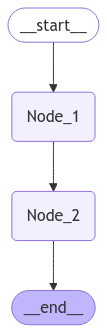

In [ ]:
class new(TypedDict):
  foo : int
  boo: int

def Node_1(state:new)->new:
  print("......Node 1.....")
  return{"boo":state["foo"]+1}

def Node_2(state:new)->new:
  print("......Node 2.....")
  return {"foo":state["boo"]+1}

builder :StateGraph = StateGraph(state_schema=new)

builder.add_node("Node_1",Node_1)
builder.add_node("Node_2",Node_2)

builder.add_edge(START,"Node_1")
builder.add_edge("Node_1","Node_2")
builder.add_edge("Node_2",END)

graph : CompiledStateGraph = builder.compile()

display(Image(graph.get_graph().draw_mermaid_png()))

In [ ]:
graph.invoke({"foo":1})

......Node 1.....
......Node 2.....


{'foo': 3, 'boo': 2}

In [ ]:
class new1(BaseModel):
  foo:int
class Private(BaseModel):
  boo : int

def node_1(state:new1)->Private:
  print("......Node 1.....")
  return {"boo":state.foo + 1}

def node_2(state:Private)->new1:
  print(".....Node 2......")
  return{"foo":state.boo + 1}

builder1 = StateGraph(state_schema=new1)

builder1.add_node("node_1",node_1)
builder1.add_node("node_2",node_2)

builder1.add_edge(START,"node_1")
builder1.add_edge("node_1","node_2")
builder1.add_edge("node_2",END)

graph1 = builder1.compile()

In [ ]:
graph1.invoke({"foo":1})

......Node 1.....
.....Node 2......


{'foo': 3}

In [ ]:
class overall(TypedDict):
  question:str
  nodes:str
  answer:str

def thinking(state:overall):
  return{"answer":"bye","nodes":"His name is Saim"}
def answering(state:overall):
  return{"answer":"bye Saim"}

build = StateGraph(overall)

build.add_node("thinking",thinking)
build.add_node("answering",answering)

build.add_edge(START,"thinking")
build.add_edge("thinking","answering")
build.add_edge("answering",END)

graphy = build.compile()

In [ ]:
graphy.invoke({"question":"What is your name"})

{'question': 'What is your name',
 'nodes': 'His name is Saim',
 'answer': 'bye Saim'}

In [ ]:
class overall1(BaseModel):
  question:str
  answer:str
  nodes:str

class InputState(BaseModel):
  question:str

class OutputState(BaseModel):
  answer:str

def thinking_node(state:InputState):
  return{"answer":"Bye Bye","nodes":"His name is Saim Hassan"}

def answering_node(state:overall1):
  return{"answer": "Bye Bye "+state.question}

built = StateGraph(overall1,input = InputState, output = OutputState)

built.add_node("thinking_node",thinking_node)
built.add_node("answering_node",answering_node)

built.add_edge(START,"thinking_node")
built.add_edge("thinking_node","answering_node")
built.add_edge("answering_node",END)

graph111 = built.compile()

In [ ]:
graph111.invoke({"question":"Saim Akhtar"})

{'answer': 'Bye Bye Saim Akhtar'}

In [ ]:
def trim(state:MessagesState):
  return{"messages":llm.invoke(state["messages"])}

msg = [HumanMessage(content="I want to know about Galaxy",name= "Saim"),
       AIMessage(content="What you want to know about that",name="AI")]
msg.append(HumanMessage(content="I want to know about the most wierd planet of our galaxy and its facts in 2 lines",name="Saim"))
msg

[HumanMessage(content='I want to know about Galaxy', additional_kwargs={}, response_metadata={}, name='Saim'),
 AIMessage(content='What you want to know about that', additional_kwargs={}, response_metadata={}, name='AI'),
 HumanMessage(content='I want to know about the most wierd planet of our galaxy and its facts in 2 lines', additional_kwargs={}, response_metadata={}, name='Saim')]

In [ ]:
building = StateGraph(MessagesState)
building.add_node("trim",trim)
building.add_edge(START,"trim")
building.add_edge("trim",END)
graphical = building.compile()

In [ ]:
g = graphical.invoke({"messages":msg})

In [ ]:
import pprint
for m in g["messages"]:
  m.pretty_print()

================================ Human Message =================================
Name: Saim

I want to know about Galaxy
================================== Ai Message ==================================
Name: AI

What you want to know about that
================================ Human Message =================================
Name: Saim

I want to know about the most wierd planet of our galaxy and its facts in 2 lines
================================== Ai Message ==================================

Defining "weirdest" is subjective, but WASP-12b is a strong contender.  This planet is tidally locked to its star, resulting in one side perpetually scorching hot and the other extremely cold, and it's also being slowly consumed by its star.


In [ ]:
async for m in graphical.astream_events({"messages":msg},version="v2"):
  print(m)
  print("/n........../n")

{'event': 'on_chain_start', 'data': {'input': {'messages': [HumanMessage(content='I want to know about Galaxy', additional_kwargs={}, response_metadata={}, name='Saim', id='af721c50-07cf-4e3a-81e2-bfe11e4b9391'), AIMessage(content='What you want to know about that', additional_kwargs={}, response_metadata={}, name='AI', id='fa244982-624d-4079-ab9c-67dd04493302'), HumanMessage(content='I want to know about the most wierd planet of our galaxy and its facts in 2 lines', additional_kwargs={}, response_metadata={}, name='Saim', id='4347d263-e16d-4a23-80f0-37fab0e5099a')]}}, 'name': 'LangGraph', 'tags': [], 'run_id': '568b1e42-04d9-49a9-912b-b3eba94e9663', 'metadata': {}, 'parent_ids': []}
/n........../n
{'event': 'on_chain_start', 'data': {'input': {'messages': [HumanMessage(content='I want to know about Galaxy', additional_kwargs={}, response_metadata={}, name='Saim', id='af721c50-07cf-4e3a-81e2-bfe11e4b9391'), AIMessage(content='What you want to know about that', additional_kwargs={}, res

In [ ]:
from langchain_core.messages import RemoveMessage
def filter_msg(state:MessagesState):
  delete_msg = [RemoveMessage(id=m.id) for m in state["messages"][:-3]]
  print(delete_msg)
  return{"messages":delete_msg}

In [ ]:
def node(state:MessagesState):
  return{"messages":llm.invoke(state["messages"])}

buildy = StateGraph(state_schema=MessagesState)

buildy.add_node("filter_msg",filter_msg)
buildy.add_node("node",node)

buildy.add_edge(START,"filter_msg")
buildy.add_edge("filter_msg","node")
buildy.add_edge("node",END)

graph1111 = buildy.compile()

In [ ]:
t= graph1111.invoke({"messages":[HumanMessage(content="I want to study about oceans"),
                              AIMessage(content="What can I help you with it"),
                              HumanMessage(content="I want to know about Green Turtles"),
                              AIMessage(content="What you want to know about that"),
                              HumanMessage(content="I want to know how to recognize them and where they are found")]})

[RemoveMessage(content='', additional_kwargs={}, response_metadata={}, id='5ef605b0-cc8f-4d5f-9f3a-8a32ffb9be53'), RemoveMessage(content='', additional_kwargs={}, response_metadata={}, id='9f0e09a4-7874-4f6d-8102-34bcf2864bd5')]


In [ ]:
for m in t["messages"]:
  m.pretty_print()

================================ Human Message =================================

I want to know about Green Turtles
================================== Ai Message ==================================

What you want to know about that
================================ Human Message =================================

I want to know how to recognize them and where they are found
================================== Ai Message ==================================

Green sea turtles are easily recognizable, though there can be some variation depending on age and location.  Here's how to identify them and where they're found:

**How to Recognize Green Sea Turtles:**

* **Shell (Carapace):**  Their carapace is typically heart-shaped and relatively smooth compared to other sea turtle species.  The color is olive-green to dark brown, often with streaks or blotches of yellow or tan.  They don't have the prominent ridges or saw-toothed edges found on some other species.  The scutes (scales) on their she

In [ ]:
def mtrim(state:MessagesState):
  return{"messages":llm.invoke(state["messages"][-1:])}

buildy1 = StateGraph(state_schema=MessagesState)

buildy1.add_node("mtrim",mtrim)
buildy1.add_edge(START,"mtrim")
buildy1.add_edge("mtrim",END)

gig = buildy1.compile()

msg = [HumanMessage(content="I want to study about oceans"),
      AIMessage(content="What can I help you with it"),
      HumanMessage(content="I want to know about Green Turtles"),
      AIMessage(content="What you want to know about that"),
      HumanMessage(content="I want to know how to recognize them and where they are found")]

msg.append(t["messages"][-1])
msg.append(HumanMessage(content="Tell me about whales as well"))



In [ ]:
for m in msg:
  m.pretty_print()

================================ Human Message =================================

I want to study about oceans
================================== Ai Message ==================================

What can I help you with it
================================ Human Message =================================

I want to know about Green Turtles
================================== Ai Message ==================================

What you want to know about that
================================ Human Message =================================

I want to know how to recognize them and where they are found
================================== Ai Message ==================================

Green sea turtles are easily recognizable, though there can be some variation depending on age and location.  Here's how to identify them and where they're found:

**How to Recognize Green Sea Turtles:**

* **Shell (Carapace):**  Their carapace is typically heart-shaped and relatively smooth compared to other sea turtle

In [ ]:
rt = gig.invoke({"messages":msg})

In [ ]:
for m in rt["messages"]:
  m.pretty_print()

================================ Human Message =================================

I want to study about oceans
================================== Ai Message ==================================

What can I help you with it
================================ Human Message =================================

I want to know about Green Turtles
================================== Ai Message ==================================

What you want to know about that
================================ Human Message =================================

I want to know how to recognize them and where they are found
================================== Ai Message ==================================

Green sea turtles are easily recognizable, though there can be some variation depending on age and location.  Here's how to identify them and where they're found:

**How to Recognize Green Sea Turtles:**

* **Shell (Carapace):**  Their carapace is typically heart-shaped and relatively smooth compared to other sea turtle

In [ ]:
from langchain_core.messages import trim_messages

In [ ]:
def n1(state:MessagesState):
  token_counter = ChatGoogleGenerativeAI(model="gemini-1.5-flash")
  messages = trim_messages(
      state["messages"],
      max_tokens=100,
      strategy = "last",
      token_counter = token_counter,
      allow_partial = False
  )
  print("Token count before trimming:", token_counter.count_tokens(state["messages"]))
  return{"messages":llm.invoke(messages)}

bully = StateGraph(MessagesState)

bully.add_node("n1",n1)
bully.add_edge(START,"n1")
bully.add_edge("n1",END)

graph000 = bully.compile()

In [ ]:
msg

[HumanMessage(content='I want to study about oceans', additional_kwargs={}, response_metadata={}, id='a32a1a9f-edd5-450d-85df-298afa0a975e'),
 AIMessage(content='What can I help you with it', additional_kwargs={}, response_metadata={}, id='8d7b8033-6b45-4b95-bd33-3b598db0fd34'),
 HumanMessage(content='I want to know about Green Turtles', additional_kwargs={}, response_metadata={}, id='05da3b63-bce4-46df-970e-6f9a5d840d35'),
 AIMessage(content='What you want to know about that', additional_kwargs={}, response_metadata={}, id='7e5c0a00-e451-4f81-a26b-2ac022415a1c'),
 HumanMessage(content='I want to know how to recognize them and where they are found', additional_kwargs={}, response_metadata={}, id='121470eb-0b19-4a6f-bc15-872d49209123'),
 AIMessage(content='Green sea turtles are easily recognizable, though there can be some variation depending on age and location.  Here\'s how to identify them and where they\'re found:\n\n**How to Recognize Green Sea Turtles:**\n\n* **Shell (Carapace):**

In [ ]:
msg.append(rt["messages"][-1])
msg.append(HumanMessage(content="Tell me about polar bears as well"))

In [ ]:
for m in msg:
  m.pretty_print()

================================ Human Message =================================

I want to study about oceans
================================== Ai Message ==================================

What can I help you with it
================================ Human Message =================================

I want to know about Green Turtles
================================== Ai Message ==================================

What you want to know about that
================================ Human Message =================================

I want to know how to recognize them and where they are found
================================== Ai Message ==================================

Green sea turtles are easily recognizable, though there can be some variation depending on age and location.  Here's how to identify them and where they're found:

**How to Recognize Green Sea Turtles:**

* **Shell (Carapace):**  Their carapace is typically heart-shaped and relatively smooth compared to other sea turtle

**LangSmith Integration**



In [ ]:
import os
%env LANGCHAIN_API_KEY = {userdata.get('LANGSMITH_API_KEY')}
os.environ["LANGCHAIN_TRACING_V2"] = "true"
os.environ["LANGCHAIN_PROJECT"] = "langchain-academy-111"

env: LANGCHAIN_API_KEY=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


In [ ]:
llm.invoke([HumanMessage(content="Hi , How are you !")])

AIMessage(content="I'm doing well, thank you for asking!  How are you today?\n", additional_kwargs={}, response_metadata={'prompt_feedback': {'block_reason': 0, 'safety_ratings': []}, 'finish_reason': 'STOP', 'safety_ratings': []}, id='run-9622fb48-e5f2-4e5d-87b8-e835dd8c960f-0', usage_metadata={'input_tokens': 7, 'output_tokens': 18, 'total_tokens': 25, 'input_token_details': {'cache_read': 0}})

In [ ]:
class State(MessagesState):
  summary : str

def node_llm_call(state:State)->State:
  summary = state.get("summary","")
  if summary:
    system_msg = f"Summary of the earlier conversation : {summary}"
    messages = [SystemMessage(content=system_msg)]+ state["messages"]
  else:
    messages = state["messages"]
  response = llm.invoke(messages)
  return {"messages":response}

In [ ]:
def node_summary(state:State)-> State:
  summary = state.get("summary","")
  if summary:
    system_msg = f"""This is the summary of the conversation upto date : {summary}
    Extend the summary by taking into account the new messages above
    """
  else:
    system_msg = "Create a summary of the conversation messages above"
  messages = state["messages"] + [HumanMessage(content=system_msg)]
  response = llm.invoke(messages)

  delete_msg = [RemoveMessage(id=m.id) for m in state["messages"][:-2]]
  return {"summary":response.content,"messages":delete_msg}

In [ ]:
def should_continue(state:State)->State:
  messages = state["messages"]
  if len(messages) > 6 :
    return "node_summary"
  else :
    return END

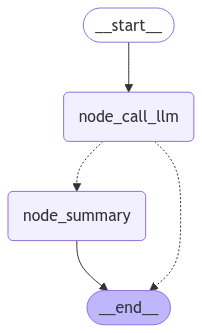

In [ ]:
builder = StateGraph(state_schema=State)

builder.add_node("node_call_llm",node_llm_call)
builder.add_node("node_summary",node_summary)

builder.add_edge(START,"node_call_llm")
builder.add_conditional_edges("node_call_llm",should_continue)
builder.add_edge("node_summary",END)

memory : MemorySaver = MemorySaver()
graph = builder.compile(checkpointer=memory)
display(Image(graph.get_graph().draw_mermaid_png()))

In [ ]:
from langgraph.checkpoint.memory import MemorySaver

In [ ]:
config = {"configurable":{"thread_id":"1"}}

inp = [HumanMessage(content="Hi , How are you !")]
out = graph.invoke({"messages": inp},config)
for m in out["messages"][-1:]:
  m.pretty_print()

inp = [HumanMessage(content = "Myself Saim Hassan Khokhar")]
out = graph.invoke({"messages": inp},config)
for m in out["messages"][-1:]:
  m.pretty_print()

inp = [HumanMessage(content="What is my name")]
out = graph.invoke({"messages":inp},config)
for m in out["messages"][-1:]:
  m.pretty_print()

inp = [HumanMessage(content="I want to know about Squid Game Season")]
out = graph.invoke({"messages":inp},config)
for m in out["messages"][-1:]:
  m.pretty_print()

================================== Ai Message ==================================

I'm doing well, thank you for asking! How are you today?
================================== Ai Message ==================================

It's nice to meet you, Saim Hassan Khokhar.  How can I help you today?
================================== Ai Message ==================================

Your name is Saim Hassan Khokhar.
================================== Ai Message ==================================

Okay, let's talk about *Squid Game* Season 2.  Unfortunately, details are still scarce.  Netflix has confirmed a second season, but hasn't released much information about the plot, characters returning, or a release date.  

What specifically about Season 2 are you interested in?  Knowing that will help me give you the most relevant information, even if it's just speculation based on the first season and interviews.  For example, are you curious about:

* **Potential plot points?** (e.g., will it focus on

In [ ]:
graph.get_state(config).values.get("summary","")

'The conversation began with pleasantries, with me, the AI, being asked how I was doing.  The user, Saim Hassan Khokhar, then introduced themselves and inquired about the *Squid Game* series, specifically the number of seasons. I responded that only one season has been released, with a second season confirmed but without a release date. I offered Saim the opportunity to ask more specific questions about the show, suggesting plot details, cast, or production as potential topics.  Saim then, seemingly testing the AI\'s memory, asked what their name was. I correctly responded with "Saim Hassan Khokhar," demonstrating the AI\'s ability to retain information from earlier in the conversation.  The conversation currently awaits Saim\'s further questions or topics of interest regarding *Squid Game* or any other subject.\n'

In [ ]:
config1 = {"configurable":{"thread_id":"2"}}

inp = [HumanMessage(content="Hi , How are you !, Myslef Ali")]
out = graph.invoke({"messages": inp},config1)
for m in out["messages"][-1:]:
  m.pretty_print()

inp = [HumanMessage(content = "Tell me about polar bears")]
out = graph.invoke({"messages": inp},config1)
for m in out["messages"][-1:]:
  m.pretty_print()

================================== Ai Message ==================================

Hi Ali! I'm doing well, thank you. How are you today?
================================== Ai Message ==================================

Polar bears ( *Ursus maritimus*) are magnificent creatures superbly adapted to the Arctic's extreme conditions.  Here's a breakdown of key aspects:

**Physical Adaptations:**

* **Size and Strength:**  They're the world's largest land predator, with males significantly outweighing females.  Their immense size and strength are crucial for hunting seals, their primary prey.
* **Insulation:**  Their fur isn't white; it's transparent and hollow, trapping air for exceptional insulation.  Beneath the fur lies a thick layer of blubber, providing further protection against the cold and acting as an energy reserve.  Their black skin absorbs sunlight for warmth.
* **Paws:**  Large paws with rough pads and non-retractable claws provide excellent grip on ice and snow, aiding both loc

In [ ]:
graph.get_state(config1).values.get("summary","")

"The conversation began with greetings and introductions.  The main topic then shifted to polar bears, with me providing detailed information about their physical characteristics, habitat, hunting strategies, reproductive behavior, and most importantly, the significant threat posed by climate change to their survival.  The conversation focused on providing comprehensive information about polar bears in response to the user's requests.\n"

In [ ]:
config2 = {"configurable":{"thread_id":"3"}}

inp = [HumanMessage(content="Hi , How are you !")]
out = graph.invoke({"messages": inp},config2)
for m in out["messages"][-1:]:
  m.pretty_print()

inp = [HumanMessage(content = "Myself Saim Hassan Khokhar")]
out = graph.invoke({"messages": inp},config2)
for m in out["messages"][-1:]:
  m.pretty_print()

inp = [HumanMessage(content="What is my name")]
out = graph.invoke({"messages":inp},config2)
for m in out["messages"][-1:]:
  m.pretty_print()

inp = [HumanMessage(content="I want to know about Squid Game Season")]
out = graph.invoke({"messages":inp},config2)
for m in out["messages"][-1:]:
  m.pretty_print()

================================== Ai Message ==================================

I'm doing well, thank you for asking!  How are you today?
================================== Ai Message ==================================

It's nice to meet you, Saim Hassan Khokhar.  Is there anything I can help you with today?
================================== Ai Message ==================================

Your name is Saim Hassan Khokhar.
================================== Ai Message ==================================

There's no official announcement of a Squid Game season 2 yet, although it's highly anticipated.  Netflix has confirmed that a second season *is* in the works, but details are scarce.  We don't know the exact release date, the plot specifics, or even which cast members will return.  

What specifically about Squid Game season 2 are you interested in?  Knowing that will help me give you a more focused answer. For example, are you curious about:

* **Potential plot points?** (Speculation

In [ ]:
graph.get_state(config2).values.get("summary","")

"The conversation began with a greeting.  I then learned the user's name is Saim Hassan Khokhar.  Finally, Saim inquired about Squid Game season 2, expressing interest in general information about its development and release, highlighting the lack of official details currently available.\n"

In [ ]:
config3 = {"configurable":{"thread_id":"4"}}

inp = [HumanMessage(content = "Myself Saim Hassan Khokhar")]
out = graph.invoke({"messages": inp},config3)
for m in out["messages"][-1:]:
  m.pretty_print()

inp = [HumanMessage(content="What is my name")]
out = graph.invoke({"messages":inp},config3)
for m in out["messages"][-1:]:
  m.pretty_print()

inp = [HumanMessage(content="I want to know about Squid Game Season")]
out = graph.invoke({"messages":inp},config3)
for m in out["messages"][-1:]:
  m.pretty_print()

================================== Ai Message ==================================

It's nice to meet you, Saim Hassan Khokhar.  Is there anything I can help you with today?
================================== Ai Message ==================================

Your name is Saim Hassan Khokhar.
================================== Ai Message ==================================

There's no official announcement of a specific "Squid Game Season" beyond Season 1.  While a second season has been confirmed, details are still scarce.  We know that:

* **Season 2 is happening:** Netflix has officially confirmed a second season.
* **The Gi-hun character will return:** Lee Jung-jae, who played Gi-hun, will reprise his role.
* **The Front Man's backstory will be explored:**  More details about the Front Man's motivations and past will be revealed.
* **Specific plot details are limited:**  Beyond these points, the creators have been relatively tight-lipped about the plot of Season 2.  They've hinted at expl

In [ ]:
graph.get_state(config3).values.get("summary","")

''

In [ ]:
inp = [HumanMessage(content= "who is the actor that played main character in Squid Game")]
out = graph.invoke({"messages":inp},config)
for m in out["messages"][-1:]:
  m.pretty_print()

================================== Ai Message ==================================

The main character, Gi-hun, in *Squid Game* is played by Lee Jung-jae.


In [ ]:
graph.get_state(config).values.get("summary","")

'The conversation began with pleasantries, with me, the AI, being asked how I was doing.  The user, Saim Hassan Khokhar, then introduced themselves and inquired about the *Squid Game* series, specifically the number of seasons. I responded that only one season has been released, with a second season confirmed but without a release date. I offered Saim the opportunity to ask more specific questions about the show, suggesting plot details, cast, or production as potential topics.  Saim then, seemingly testing the AI\'s memory, asked what their name was. I correctly responded with "Saim Hassan Khokhar," demonstrating the AI\'s ability to retain information from earlier in the conversation.  The conversation currently awaits Saim\'s further questions or topics of interest regarding *Squid Game* or any other subject.\n'

In [ ]:
inp = [HumanMessage(content= "Tell me about Memories of Murder Movie")]
out = graph.invoke({"messages":inp},config)
for m in out["messages"][-1:]:
  m.pretty_print()

================================== Ai Message ==================================

*Memories of Murder* (살인의 추억) is a 2003 South Korean neo-noir crime thriller film directed by Bong Joon-ho, known for his later works like *Parasite* and *Okja*.  It's based on the true story of the Hwaseong serial murders that took place in South Korea between 1986 and 1991.  The film never explicitly identifies the killer, mirroring the real-life case which remains unsolved.

Here are some key aspects of the film:

* **Plot:** The film follows two detectives, a seasoned but somewhat bumbling detective Park Doo-man (Song Kang-ho) and a younger, more by-the-book detective Seo Tae-yoon (Kim Sang-kyung), as they investigate a series of brutal rapes and murders in a rural area.  Their investigation is hampered by a lack of resources, outdated investigative techniques, and the societal pressures of the time.  The film masterfully builds suspense and tension as the detectives chase leads, encounter dead ends, 

In [ ]:
graph.get_state(config).values.get("summary","")

"The conversation continued with Saim Hassan Khokhar shifting the topic to the actor who played the main character in *Squid Game*, which I correctly identified as Lee Jung-jae.  Saim then inquired about the South Korean film *Memories of Murder*, prompting me to provide a detailed summary of the film, including its plot, themes, director (Bong Joon-ho), and overall impact.  The summary highlighted the film's neo-noir style, its basis on a true unsolved crime, and its exploration of justice, incompetence, and societal pressures.  The conversation now awaits Saim's next question or topic of discussion.\n"

In [ ]:
inp = [HumanMessage(content="Who is the villain in Squid Game")]
out = graph.invoke({"messages":inp},config)
for m in out["messages"][-1:]:
  m.pretty_print()

================================== Ai Message ==================================

There isn't a single, easily identifiable villain in *Squid Game*.  The show's antagonist is more of a systemic one.  While the Front Man is the face of the operation and directly responsible for the games' brutal execution, he's ultimately a pawn in a larger, more sinister game orchestrated by the unseen VIPs.  These wealthy individuals are the true antagonists, profiting from the suffering and death of the players while remaining detached and anonymous.  So, the "villain" is less a single person and more the corrupt system and the wealthy elite who benefit from it.


In [ ]:
graph.get_state(config).values.get("summary","")

"The conversation continued with Saim Hassan Khokhar shifting the topic to the actor who played the main character in *Squid Game*, which I correctly identified as Lee Jung-jae.  Saim then inquired about the South Korean film *Memories of Murder*, prompting me to provide a detailed summary of the film, including its plot, themes, director (Bong Joon-ho), and overall impact.  The summary highlighted the film's neo-noir style, its basis on a true unsolved crime, and its exploration of justice, incompetence, and societal pressures.  The conversation now awaits Saim's next question or topic of discussion.\n"

In [ ]:
inp = [HumanMessage(content="Who is the heroin in Squid Game")]
out = graph.invoke({"messages":inp},config)
for m in out["messages"][-1:]:
  m.pretty_print()

================================== Ai Message ==================================

There is no single character definitively identified as *the* heroin in *Squid Game*.  The show features many characters facing immense hardship and struggling for survival, each with their own compelling story and motivations.  While some characters might be considered more heroic than others based on their actions and choices, there isn't one character who embodies the role of a traditional "hero" in a clear-cut way.


In [ ]:
graph.get_state(config).values.get("summary","")

"The conversation continued with Saim Hassan Khokhar shifting the topic to the actor who played the main character in *Squid Game*, which I correctly identified as Lee Jung-jae.  Saim then inquired about the South Korean film *Memories of Murder*, prompting me to provide a detailed summary of the film, including its plot, themes, director (Bong Joon-ho), and overall impact.  The summary highlighted the film's neo-noir style, its basis on a true unsolved crime, and its exploration of justice, incompetence, and societal pressures.  Following this, Saim, or perhaps prompted by my previous responses, asked about the villain and the heroine in *Squid Game*.  I explained that there isn't a single, easily identifiable villain, but rather a systemic one, with the wealthy VIPs and the corrupt system they represent being the true antagonists, rather than the Front Man.  Furthermore, I clarified that there's no single heroine in *Squid Game*, but rather multiple characters facing hardship and str

In [ ]:
!pip install --quiet -U langgraph-checkpoint-sqlite

In [ ]:
import sqlite3

In [ ]:
!mkdir -p state_db && [ ! -f state_db/example.db ] && wget -P state_db https://github.com/langchain-ai/langchain-academy/raw/main/module-2/state_db/example.db
db_path = "state_db/example.db"
conn = sqlite3.connect(db_path, check_same_thread=False)

--2024-12-12 15:05:30--  https://github.com/langchain-ai/langchain-academy/raw/main/module-2/state_db/example.db
Resolving github.com (github.com)... 140.82.114.3
Connecting to github.com (github.com)|140.82.114.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/langchain-ai/langchain-academy/main/module-2/state_db/example.db [following]
--2024-12-12 15:05:31--  https://raw.githubusercontent.com/langchain-ai/langchain-academy/main/module-2/state_db/example.db
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.108.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 110592 (108K) [application/octet-stream]
Saving to: ‘state_db/example.db’

example.db          100%[===================>] 108.00K  --.-KB/s    in 0.02s   

2024-12-12 15:05:31 (4.31 MB/s) - ‘s

In [ ]:
from langchain_core.messages import RemoveMessage

In [ ]:
from langgraph.checkpoint.sqlite import SqliteSaver
memory: SqliteSaver = SqliteSaver(conn)

In [ ]:
graph1 = builder.compile(checkpointer=memory)

In [ ]:
config111 = {"configurable":{"thread_id":"111"}}

input111 = [HumanMessage(content="Hi, I am Saim Hassan Akhtar")]
output111 = graph1.invoke({"messages":input111},config111)
for m in output111["messages"][-1:]:
  m.pretty_print()

input111 = [HumanMessage(content="What is my name")]
output111 = graph1.invoke({"messages":input111},config111)
for m in output111["messages"][-1:]:
  m.pretty_print()

input111 = [HumanMessage(content="I like UFC")]
output111 = graph1.invoke({"messages":input111},config111)
for m in output111["messages"][-1:]:
  m.pretty_print()

================================== Ai Message ==================================

It's nice to meet you, Saim Hassan Akhtar.  How can I help you today?
================================== Ai Message ==================================

Your name is Saim Hassan Akhtar.
================================== Ai Message ==================================

That's great!  UFC is exciting.  Do you have a favorite fighter or weight class?


In [ ]:
graph_state = graph1.get_state(config111)
graph_state

StateSnapshot(values={'messages': [HumanMessage(content='What is my name', additional_kwargs={}, response_metadata={}, id='fe9bc5ff-32b0-4717-9460-8e5f7026bf01'), AIMessage(content='I do not know your name.  I have no access to personal information about you unless you explicitly provide it to me.\n', additional_kwargs={}, response_metadata={'prompt_feedback': {'block_reason': 0, 'safety_ratings': []}, 'finish_reason': 'STOP', 'safety_ratings': []}, id='run-fe79dc1f-ee7b-480e-a7c9-14e3a8036205-0', usage_metadata={'input_tokens': 5, 'output_tokens': 26, 'total_tokens': 31, 'input_token_details': {'cache_read': 0}}), HumanMessage(content='What is my name', additional_kwargs={}, response_metadata={}, id='b95b4b6f-23a6-4529-a4b7-76aca09f02b4'), AIMessage(content="I don't know your name.  I have no memory of past conversations and cannot access personal information about you.\n", additional_kwargs={}, response_metadata={'prompt_feedback': {'block_reason': 0, 'safety_ratings': []}, 'finish_r

In [ ]:
config111 = {"configurable":{"thread_id":"111"}}

# **MAIN CODE**

In [ ]:
!pip install --quiet -U langgraph

%pip install -q -U langchain
%pip install -q -U langchain-google-genai

from google.colab import userdata
GEMINI_API_KEY = userdata.get('GEMINI_API_KEY')

from langchain_google_genai import ChatGoogleGenerativeAI
llm = ChatGoogleGenerativeAI(
    model="gemini-1.5-flash",
    api_key = GEMINI_API_KEY,
    temperature=0
)

from langchain_core.messages import SystemMessage, HumanMessage, RemoveMessage

from langgraph.graph import END
from langgraph.graph import MessagesState

from IPython.display import Image, display
from langgraph.graph import StateGraph, START
from langgraph.graph.state import CompiledStateGraph

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.7/135.7 kB 2.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.7/43.7 kB 1.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 9.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 411.6/411.6 kB 7.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.3/41.3 kB 1.5 MB/s eta 0:00:00


In [ ]:
!mkdir -p state_db && [ ! -f state_db/example.db ] && wget -P state_db https://github.com/langchain-ai/langchain-academy/raw/main/module-2/state_db/example.db


--2024-12-21 10:21:22--  https://github.com/langchain-ai/langchain-academy/raw/main/module-2/state_db/example.db
Resolving github.com (github.com)... 140.82.112.4
Connecting to github.com (github.com)|140.82.112.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/langchain-ai/langchain-academy/main/module-2/state_db/example.db [following]
--2024-12-21 10:21:22--  https://raw.githubusercontent.com/langchain-ai/langchain-academy/main/module-2/state_db/example.db
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 110592 (108K) [application/octet-stream]
Saving to: ‘state_db/example.db’

example.db          100%[===================>] 108.00K  --.-KB/s    in 0.02s   

2024-12-21 10:21:22 (4.35 MB/s) - ‘s

# Non Persistant

In [ ]:
%pip install --quiet -U langgraph-checkpoint-sqlite
db_path = "state_db/example.db"
import sqlite3
conn = sqlite3.connect(db_path, check_same_thread=False)
from langgraph.checkpoint.sqlite import SqliteSaver
memory: SqliteSaver = SqliteSaver(conn)

# Persistant With Drive

In [ ]:
%pip install --quiet -U langgraph-checkpoint-sqlite
import sqlite3
file_path = "/content/drive/MyDrive/state_db/example (3).db"
conn = sqlite3.connect(file_path,check_same_thread=False)
from langgraph.checkpoint.sqlite import SqliteSaver
memory: SqliteSaver = SqliteSaver(conn)

# Best CODE

In [ ]:
class State(MessagesState):
  summary : str

def node_llm_call(state:State)->State:
  summary = state.get("summary","")
  if summary:
    summary = f"Summary of the earlier conversation : {summary}"
    messages =[SystemMessage(content=summary)] + state["messages"]
  else:
    messages = state["messages"]
  response = llm.invoke(messages)
  return {"messages":response}

def summarization(state:State)->State:
  summary = state.get("summary","")
  if summary:
    SystemMessage=f"""This is the summary of the conversation before {summary}
    Extend this summary by taking into account the new messages above
    """
  else:
    SystemMessage = "Create a summary of the conversational messages above"
  messages = state["messages"] + [HumanMessage(content= SystemMessage)]
  response = llm.invoke(messages)
  delete_msg = [RemoveMessage(id=m.id) for m in state["messages"][:-2]]
  return {"summary":response.content,"messages":delete_msg}

def should_continue(state:State)->State:
  messages = state["messages"]
  if len(messages) > 6 :
    return "summarization"
  else:
    return END

In [ ]:
builder : StateGraph = StateGraph(state_schema=State)

builder.add_node("node_llm_call",node_llm_call)
builder.add_node("summarization",summarization)

builder.add_edge(START,"node_llm_call")
builder.add_conditional_edges("node_llm_call",should_continue)
builder.add_edge("summarization",END)

graph :CompiledStateGraph = builder.compile(checkpointer=memory)

In [ ]:
config7 = {"configurable":{"thread_id":"7"}}
input = HumanMessage(content="Hi I am SHA")
output = graph.invoke({"messages":[input]},config7)
import pprint
for m in output["messages"][-1:]:
  m.pretty_print()

input_message = HumanMessage(content="I am Agentic AI Engineer?")
output = graph.invoke({"messages": [input_message]},config7)
for m in output['messages'][-1:]:
    m.pretty_print()

input_message = HumanMessage(content="My Favourite Sports is Cricket!")
output = graph.invoke({"messages": [input_message]},config7)
for m in output['messages'][-1:]:
    m.pretty_print()

================================== Ai Message ==================================

Hello SHA!  It's nice to meet you. How can I help you today?
================================== Ai Message ==================================

That's interesting!  "Agentic AI Engineer" isn't a standard job title, but it suggests you work with AI systems that exhibit agency – meaning they can act independently and pursue goals.  This could involve many different areas, such as:

* **Reinforcement learning:** Training AI agents to make decisions and learn from their actions in an environment.
* **Robotics:** Building and programming robots that can operate autonomously.
* **Autonomous systems:** Developing self-driving cars, drones, or other systems that operate without human intervention.
* **AI safety and alignment:** Ensuring that agentic AI systems behave ethically and safely.

To better understand what you do, could you tell me more about your specific responsibilities and projects?  I'd be interested

In [ ]:
config7 = {"configurable": {"thread_id": "7"}}
input_message = HumanMessage(content="what is my name , occupation and favourite sport")
output = graph.invoke({"messages": [input_message]},config7)
for m in output['messages'][-1:]:
    m.pretty_print()

================================== Ai Message ==================================

Based on our conversation:

* **Name:** SHA
* **Occupation:** Agentic AI Engineer
* **Favorite Sport:** Cricket


In [ ]:
config7 = {"configurable": {"thread_id": "7"}}
graph_state = graph.get_state(config7)
graph_state

StateSnapshot(values={'messages': [HumanMessage(content='Hi I am SHA', additional_kwargs={}, response_metadata={}, id='6c76f2f4-6dca-4474-a9e9-6c048baf24f3'), AIMessage(content="Hello SHA!  It's nice to meet you. How can I help you today?\n", additional_kwargs={}, response_metadata={'prompt_feedback': {'block_reason': 0, 'safety_ratings': []}, 'finish_reason': 'STOP', 'safety_ratings': []}, id='run-65670dbe-eb8d-43a2-9285-175695b62809-0', usage_metadata={'input_tokens': 5, 'output_tokens': 20, 'total_tokens': 25, 'input_token_details': {'cache_read': 0}}), HumanMessage(content='I am Agentic AI Engineer?', additional_kwargs={}, response_metadata={}, id='e62548db-969f-472d-bf82-9f7788058654'), AIMessage(content='That\'s interesting!  "Agentic AI Engineer" isn\'t a standard job title, but it suggests you work with AI systems that exhibit agency – meaning they can act independently and pursue goals.  This could involve many different areas, such as:\n\n* **Reinforcement learning:** Trainin

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!ls state_db

example.db  example.db-shm  example.db-wal


In [ ]:
from google.colab import files
files.download("state_db/example.db")
files.download("state_db/example.db-wal")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
%%capture --no-stderr
%pip install -U langgraph langgraph-checkpoint-postgres psycopg psycopg-pool langchain_google_genai

In [ ]:
from google.colab import userdata
DB_URI = userdata.get('DB_URI')

In [ ]:
from psycopg_pool import ConnectionPool
from langgraph.checkpoint.postgres import PostgresSaver

connection_kwargs = {"autocommit": True, "prepare_threshold": 0}
pool = ConnectionPool(conninfo=DB_URI, max_size=20, kwargs=connection_kwargs)
checkpointer = PostgresSaver(pool)
checkpointer.setup()

In [ ]:
graph1 = builder.compile(checkpointer=checkpointer)

In [ ]:
config1 = {"configurable":{"thread_id":"1"}}
input = [HumanMessage(content="Hi I am Saim Khokar")]
output = graph1.invoke({"messages":input},config1)
for m in output["messages"][-1:]:
  m.pretty_print()

================================== Ai Message ==================================

Hello Saim Khokar!  It's nice to meet you.  How can I help you today?


In [ ]:
input = [HumanMessage(content="I like MMA")]
output = graph1.invoke({"messages":input},config1)
for m in output["messages"][-1:]:
  m.pretty_print()

================================== Ai Message ==================================

That's great!  MMA is a really exciting sport.  Are there any particular aspects of MMA that you enjoy the most?  Do you have a favorite fighter, weight class, or promotion?


In [ ]:
input = [HumanMessage(content="My Favourite fighter is Khabib Nurmegamedov")]
output = graph1.invoke({"messages":input},config1)
for m in output["messages"][-1:]:
  m.pretty_print()

================================== Ai Message ==================================

Excellent choice! Khabib Nurmagomedov was a dominant force in the UFC lightweight division.  His undefeated record and grappling prowess are legendary.  What aspects of his fighting style did you particularly admire?  His pressure, his grappling, his cardio?


In [ ]:
config1 = {"configurable":{"thread_id":"1"}}
input = [HumanMessage(content="what is my name")]
output = graph1.invoke({"messages":input},config1)
for m in output["messages"][-1:]:
  m.pretty_print()

================================== Ai Message ==================================

Your name is Saim Khokar.


In [ ]:
input = [HumanMessage(content="what do I like")]
output = graph1.invoke({"messages":input},config1)
for m in output["messages"][-1:]:
  m.pretty_print()

================================== Ai Message ==================================

Based on our previous conversation, you like MMA and your favorite fighter is Khabib Nurmagomedov.


In [ ]:
pool.close()